# Restaurant Visitor Forecasting

## Table of contents

* 1. Introduction
* 2. Preparations
    * 2.1. Load libraries
    * 2.1. Load data
* 3. Overview
    * 3.1. air_visit_data
    * 3.2. Air Reserve
    * 3.3. Hpg reserve
    * 3.4. Air Reserve
    * 3.5. Air store
    * 3.6. Hpg store
    * 3.7. date_info
    * 3.8. Store IDs
    * 3.9. Submission data
* 4. Individual feature visualisation
    * 3.1. Air Visits
    * 4.2 Hpg reserve
    * 4.3 Hpg store
    * 4.4 air_reserve
    * 4.5. Holiday
* 5. Modeling
* 6. Ref

## 1. Introduction
Ïù¥ ÎåÄÌöåÏóêÏÑúÎäî ÏòàÏïΩ Î∞è Î∞©Î¨∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ **ÎØ∏Îûò ÎÇ†ÏßúÏùò Î†àÏä§ÌÜ†Îûë Ï¥ù Î∞©Î¨∏Ïûê ÏàòÎ•º ÏòàÏ∏°**Ìï¥Ïïº Ìï©ÎãàÎã§.

**ÌèâÍ∞Ä**
* **RMSLE**Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§
\\[ \sqrt{ \frac{1}{n} \sum_{i=1}^{n}{ (\log( p_i + 1) - \log(a_i + 1))^2} }\\]

* \\(n\\) is Í¥ÄÏ∏°Îêú Ï¥ù Ïà´Ïûê   
* \\(p_i\\) is ÏòàÏÉÅÌïú Î∞©Î¨∏Ïûê Ïàò   
* \\(a_i\\) is Ïã§Ï†ú Î∞©Î¨∏Ïûê Ïàò   
* \\(\logùë•\\) is \\(x\\)Ïùò ÏûêÏó∞Î°úÍ∑∏


**Ï†úÍ≥µÎêòÎäî Îç∞Ïù¥ÌÑ∞**
* Hot Pepper Gourmet (hpg): ÏÇ¨Ïö©ÏûêÎì§Ïù¥ Î†àÏä§ÌÜ†ÎûëÏùÑ Í≤ÄÏÉâÌïòÍ≥† Ïò®ÎùºÏù∏ ÏòàÏïΩÌï† Ïàò ÏûàÎäî ÏÑúÎπÑÏä§
* AirREGI / Restaurant Board (air): Îß§Ïû•ÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî ÏòàÏïΩÍ¥ÄÎ¶¨ÏãúÏä§ÌÖú (POS)
* ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Îäî 2016ÎÖÑ~2017ÎÖÑ 4ÏõîÍπåÏßÄ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî 2017ÎÖÑ 4ÏõîÍ≥º 5Ïõî ÎßàÏßÄÎßâÏ£ºÍπåÏßÄ Ï†úÍ≥µÎê©ÎãàÎã§
* ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî Í≥®Îì†ÏúÑÌÅ¨ Í∏∞Í∞ÑÏù¥ Ìè¨Ìï®ÎêòÏñ¥ÏûàÏäµÎãàÎã§.
* ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏóêÎäî Î†àÏä§ÌÜ†ÎûëÏù¥ Î¨∏ÏùÑ Îã´Í≥† Î∞©Î¨∏ÏûêÍ∞Ä ÏóÜÎäî ÎÇ†Ïù¥ ÏûàÏóàÏäµÎãàÎã§. Ïä§ÏΩîÏñ¥ÎßÅ Ïãú Î¨¥ÏãúÎê©ÎãàÎã§. ÌõàÎ†® ÏÑ∏Ìä∏Îäî Î†àÏä§ÌÜ†ÎûëÏù¥ Î¨∏ÏùÑ Îã´Îäî ÎÇ†ÏùÑ ÏÉùÎûµÌï©ÎãàÎã§.

**ÌååÏùº ÏÑ§Î™Ö**
* air_visit_data.csv: air Î†àÏä§ÌÜ†ÎûëÏùò Í≥ºÍ±∞ Î∞©Î¨∏ Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§. Ïù¥Í≤ÉÏùÄ Î≥∏ÏßàÏ†ÅÏúºÎ°ú Ï£ºÏöî ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏûÖÎãàÎã§.  
* air_reserve.csv / hpg_reserve.csv: air / hpg ÏãúÏä§ÌÖúÏùÑ ÌÜµÌïú ÏòàÏïΩ.  
* air_store_info.csv / hpg_store_info.csv: Ïû•Î•¥ Î∞è ÏúÑÏπòÎ•º Ìè¨Ìï®Ìïú air / hpg Î†àÏä§ÌÜ†ÎûëÏóê ÎåÄÌïú ÏÑ∏Î∂Ä Ï†ïÎ≥¥ÏûÖÎãàÎã§.  
* store_id_relation.csv: airÏôÄ hpg idÎ•º Ïó∞Í≤∞Ìï©ÎãàÎã§.
* date_info.csv: ÏùºÎ≥∏ Í≥µÌú¥ÏùºÏóê ÌîåÎûòÍ∑∏Î•º ÏßÄÏ†ïÌï©ÎãàÎã§.  
* sample_submission.csv: ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§. idÎäî air idÏôÄ Î∞©Î¨∏ ÎÇ†ÏßúÎ•º Í≤∞Ìï©ÌïòÏó¨ Íµ¨ÏÑ±Îê©ÎãàÎã§.

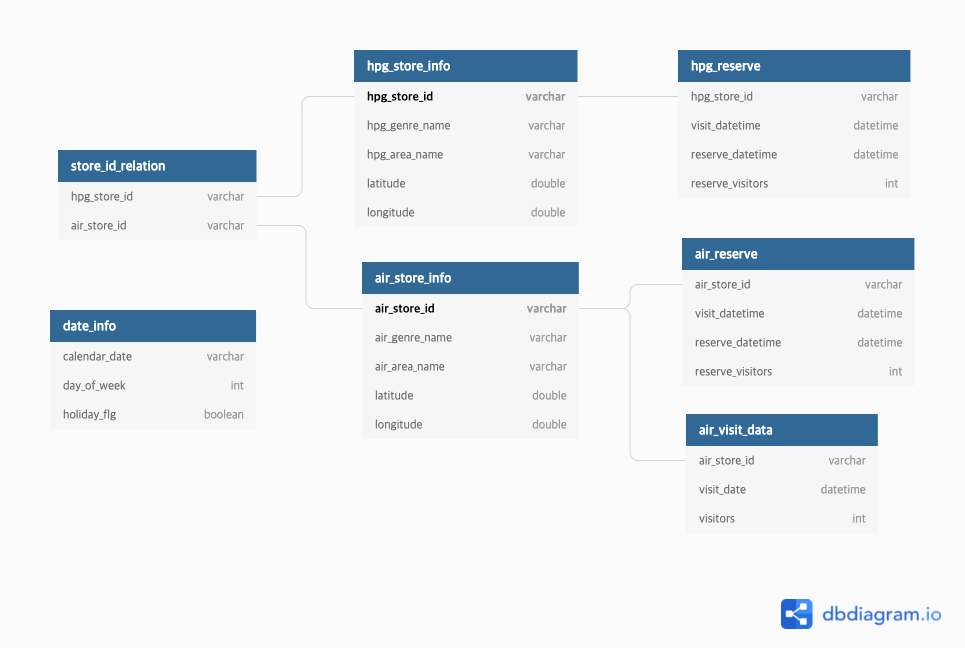

## 2. Preparations

### 2.1 Load libraries

In [8]:
import time
import numpy as np
import pandas as pd
from dateutil.parser import parse
from datetime import date, timedelta
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import math, warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

# mpl_toolkits.basemapÏùÑ import Ìï† Îïå Î∞úÏÉùÌïòÎäî KeyError:'PROJ_LIB' ÏóêÎü¨Î•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ PROJ_LIB ÏÑ§Ï†ï
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

from mpl_toolkits.basemap import Basemap

### 2.2 Load data

In [11]:
data_path = './data/'

air_visits = pd.read_csv(data_path + 'air_visit_data.csv')
air_reserve = pd.read_csv(data_path + 'air_reserve.csv')
hpg_reserve = pd.read_csv(data_path + 'hpg_reserve.csv')
air_store = pd.read_csv(data_path + 'air_store_info.csv')
hpg_store = pd.read_csv(data_path + 'hpg_store_info.csv')
store_id_map = pd.read_csv(data_path + 'store_id_relation.csv')
date_info = pd.read_csv(data_path + 'date_info.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

## 3. Overview

### 3.1 air_visit_data

### air_visit_data
air ÏãúÏä§ÌÖúÏóêÏÑú ÏßëÍ≥ÑÌïú Î†àÏä§ÌÜ†ÎûëÏùò Í≥ºÍ±∞ Î∞©Î¨∏ Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§
* air_store_id : air ÏãúÏä§ÌÖúÏÉÅÏùò ÏÉÅÏ†ê Í≥†Ïú†Í∞í
* visit_date : Î∞©Î¨∏Ïùº
* visitors : Î∞©Î¨∏Ïûê Ïàò

In [12]:
air_visits.head()

air_store_id  visit_date  visitors
0  air_ba937bf13d40fb24  2016-01-13        25
1  air_ba937bf13d40fb24  2016-01-14        32
2  air_ba937bf13d40fb24  2016-01-15        29
3  air_ba937bf13d40fb24  2016-01-16        22
4  air_ba937bf13d40fb24  2016-01-18         6

### 3.2 Air Reserve

airÏóêÏÑú Ïù¥Î£®Ïñ¥ÏßÑ ÏòàÏïΩ
- air_store_id - Ìï≠Í≥µ ÏãúÏä§ÌÖúÏóêÏÑú Î†àÏä§ÌÜ†ÎûëÏùò id
- visit_datetime - ÏòàÏïΩ ÏãúÍ∞Ñ(Î∞©Î¨∏ ÏãúÍ∞Ñ)
- reserve_datetime - ÏòàÏïΩÌïú ÏãúÍ∞Ñ
- reserve_visitors - Ìï¥Îãπ ÏòàÏïΩÏùò Î∞©Î¨∏Ïûê Ïàò

In [13]:
air_reserve.head()

air_store_id    visit_datetime  reserve_datetime  reserve_visitors
0  air_877f79706adbfb06  2016-01-01 19:00  2016-01-01 16:00                 1
1  air_db4b38ebe7a7ceff  2016-01-01 19:00  2016-01-01 19:00                 3
2  air_db4b38ebe7a7ceff  2016-01-01 19:00  2016-01-01 19:00                 6
3  air_877f79706adbfb06  2016-01-01 20:00  2016-01-01 16:00                 2
4  air_db80363d35f10926  2016-01-01 20:00   2016-01-01 1:00                 5

In [14]:
air_reserve.describe()

reserve_visitors
count      92378.000000
mean           4.481749
std            4.919669
min            1.000000
25%            2.000000
50%            3.000000
75%            5.000000
max          100.000000

### 3.3 Hpg reserve

hpg ÏãúÏä§ÌÖúÏóêÏÑú Ïù¥Î£®Ïñ¥ÏßÑ ÏòàÏïΩ
- hpg_store_id - hpg ÏãúÏä§ÌÖúÏùò Î†àÏä§ÌÜ†Îûë ID
- visit_datetime - ÏòàÏïΩ ÏãúÍ∞Ñ
- reserve_datetime - ÏòàÏïΩÌïú ÏãúÍ∞Ñ
- reserve_visitors - Ìï¥Îãπ ÏòàÏïΩÏùò Î∞©Î¨∏Ïûê Ïàò

In [15]:
hpg_reserve.head()

hpg_store_id       visit_datetime     reserve_datetime  \
0  hpg_c63f6f42e088e50f  2016-01-01 11:00:00  2016-01-01 09:00:00   
1  hpg_dac72789163a3f47  2016-01-01 13:00:00  2016-01-01 06:00:00   
2  hpg_c8e24dcf51ca1eb5  2016-01-01 16:00:00  2016-01-01 14:00:00   
3  hpg_24bb207e5fd49d4a  2016-01-01 17:00:00  2016-01-01 11:00:00   
4  hpg_25291c542ebb3bc2  2016-01-01 17:00:00  2016-01-01 03:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 2  
3                 5  
4                13

In [16]:
hpg_reserve.describe()

reserve_visitors
count      2.000320e+06
mean       5.073785e+00
std        5.416172e+00
min        1.000000e+00
25%        2.000000e+00
50%        3.000000e+00
75%        6.000000e+00
max        1.000000e+02

### 3.4 Air store

ÏùºÎ∂Ä air Î†àÏä§ÌÜ†ÎûëÏóê ÎåÄÌïú Ï†ïÎ≥¥
- air_store_id
- air_genre_name
- air_area_name
- latitude
- longitude

In [17]:
air_store.head()

air_store_id  air_genre_name                 air_area_name  \
0  air_0f0cdeee6c9bf3d7  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
1  air_7cc17a324ae5c7dc  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
2  air_fee8dcf4d619598e  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
3  air_a17f0778617c76e2  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
4  air_83db5aff8f50478e  Italian/French  T≈çky≈ç-to Minato-ku Shibak≈çen   

    latitude   longitude  
0  34.695124  135.197852  
1  34.695124  135.197852  
2  34.695124  135.197852  
3  34.695124  135.197852  
4  35.658068  139.751599

In [18]:
air_store.describe()

latitude   longitude
count  829.000000  829.000000
mean    35.647042  137.415311
std      2.084659    3.650971
min     33.211967  130.195555
25%     34.695124  135.341564
50%     35.658068  139.685474
75%     35.694003  139.751599
max     44.020632  144.273398

### 3.5 Hpg store

ÏùºÎ∂Ä hpg Î†àÏä§ÌÜ†ÎûëÏóê ÎåÄÌïú Ï†ïÎ≥¥
- hpg_store_id
- hpg_genre_name
- hpg_area_name
- latitude
- longitude

In [19]:
hpg_store.head()

hpg_store_id  hpg_genre_name                  hpg_area_name  \
0  hpg_6622b62385aec8bf  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   
1  hpg_e9e068dd49c5fa00  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   
2  hpg_2976f7acb4b3a3bc  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   
3  hpg_e51a522e098f024c  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   
4  hpg_e3d0e1519894f275  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   

    latitude   longitude  
0  35.643675  139.668221  
1  35.643675  139.668221  
2  35.643675  139.668221  
3  35.643675  139.668221  
4  35.643675  139.668221

In [20]:
hpg_store.describe()

latitude    longitude
count  4690.000000  4690.000000
mean     35.810261   137.675816
std       2.138755     3.197233
min      33.311645   130.339313
25%      34.692109   135.498859
50%      35.659214   139.495733
75%      35.703381   139.737998
max      43.774846   143.714585

### 3.6 date_info

ÎÇ†Ïßú/ÏöîÏùº/Í≥µÌú¥Ïùº ÌîåÎ†àÍ∑∏Î•º Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§
* calendar_date : ÎÇ†Ïßú (yyyy-mm-dd)
* day_of_week : ÏöîÏùº
* holiday_flg : Í≥µÌú¥Ïùº flag (Í≥µÌú¥ÏùºÏù¥Î©¥ 1, ÏïÑÎãàÎ©¥ 0)

In [21]:
date_info.head()

calendar_date day_of_week  holiday_flg
0    2016-01-01      Friday            1
1    2016-01-02    Saturday            1
2    2016-01-03      Sunday            1
3    2016-01-04      Monday            0
4    2016-01-05     Tuesday            0

### 3.7 Store IDs

- hpg_store_id
- air_store_id

In [22]:
store_id_map.head()

air_store_id          hpg_store_id
0  air_63b13c56b7201bd9  hpg_4bc649e72e2a239a
1  air_a24bf50c3e90d583  hpg_c34b496d0305a809
2  air_c7f78b4f3cba33ff  hpg_cd8ae0d9bbd58ff9
3  air_947eb2cae4f3e8f2  hpg_de24ea49dc25d6b8
4  air_965b2e0cf4119003  hpg_653238a84804d8e7

### 3.8 Submission data

- idÎäî air_store_idand visit_dateÎ•º Î∞ëÏ§Ñ Î°ú Ïó∞Í≤∞ÌïòÏó¨ Íµ¨ÏÑ±Îê©ÎãàÎã§.
- visitorsÎäî Îß§Ïû• Î∞è ÎÇ†Ïßú Ï°∞Ìï©Ïóê ÎåÄÌïú ÏòàÏÉÅ Î∞©Î¨∏Ïûê Ïàò

In [23]:
submission.head()

id  visitors
0  air_00a91d42b08b08d9_2017-04-23         0
1  air_00a91d42b08b08d9_2017-04-24         0
2  air_00a91d42b08b08d9_2017-04-25         0
3  air_00a91d42b08b08d9_2017-04-26         0
4  air_00a91d42b08b08d9_2017-04-27         0

### 3.9 Missing values

In [24]:
file_list = [air_visits, air_reserve ,hpg_reserve ,air_store ,hpg_store ,date_info ,store_id_map ,submission]

for file in file_list:
    for column in file.columns:
        print('{} : {}'.format(column, sum(file[column].isnull()))) # df.isnull() ÏÇ¨Ïö©Ìï¥ Í≤∞Ï∏°Ïπò ÌååÏïÖ
    print('***'*20)

air_store_id : 0
visit_date : 0
visitors : 0
************************************************************
air_store_id : 0
visit_datetime : 0
reserve_datetime : 0
reserve_visitors : 0
************************************************************
hpg_store_id : 0
visit_datetime : 0
reserve_datetime : 0
reserve_visitors : 0
************************************************************
air_store_id : 0
air_genre_name : 0
air_area_name : 0
latitude : 0
longitude : 0
************************************************************
hpg_store_id : 0
hpg_genre_name : 0
hpg_area_name : 0
latitude : 0
longitude : 0
************************************************************
calendar_date : 0
day_of_week : 0
holiday_flg : 0
************************************************************
air_store_id : 0
hpg_store_id : 0
************************************************************
id : 0
visitors : 0
************************************************************


Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.

## 4. Individual feature visualisation

### 4.1 Air Visits

In [25]:
air_visits['visit_date'] = pd.to_datetime(air_visits['visit_date'])
air_visits['day'] = air_visits['visit_date'].dt.day
air_visits['dow'] = air_visits['visit_date'].dt.dayofweek
air_visits['year'] = air_visits['visit_date'].dt.year
air_visits['month'] = air_visits['visit_date'].dt.month
air_visits['week'] = air_visits['visit_date'].dt.week
air_visits['quarter'] = air_visits['visit_date'].dt.quarter
air_visits['visit_date'] = air_visits['visit_date'].dt.date
air_visits['year_mth'] = air_visits['year'].astype(str)+'-'+air_visits['month'].astype(str)

In [26]:
air_visits.columns

Index(['air_store_id', 'visit_date', 'visitors', 'day', 'dow', 'year', 'month',
       'week', 'quarter', 'year_mth'],
      dtype='object')

In [27]:
air_visits.head()

air_store_id  visit_date  visitors  day  dow  year  month  week  \
0  air_ba937bf13d40fb24  2016-01-13        25   13    2  2016      1     2   
1  air_ba937bf13d40fb24  2016-01-14        32   14    3  2016      1     2   
2  air_ba937bf13d40fb24  2016-01-15        29   15    4  2016      1     2   
3  air_ba937bf13d40fb24  2016-01-16        22   16    5  2016      1     2   
4  air_ba937bf13d40fb24  2016-01-18         6   18    0  2016      1     3   

   quarter year_mth  
0        1   2016-1  
1        1   2016-1  
2        1   2016-1  
3        1   2016-1  
4        1   2016-1

In [28]:
air_visits.dtypes

air_store_id    object
visit_date      object
visitors         int64
day              int64
dow              int64
year             int64
month            int64
week             int64
quarter          int64
year_mth        object
dtype: object

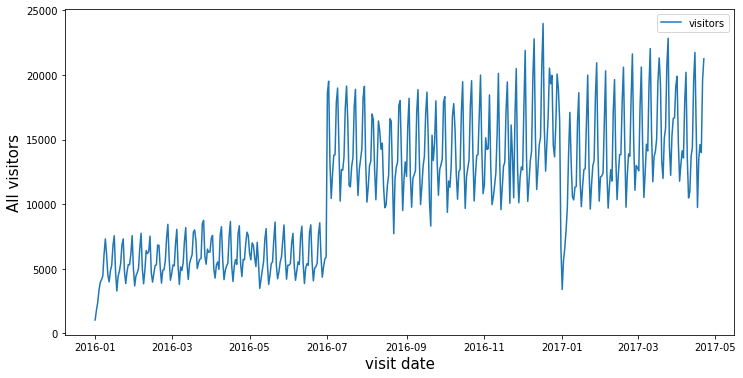

In [29]:
visitors_by_date = air_visits.groupby(['visit_date']).agg({'visitors': np.sum})
fig,ax = plt.subplots(figsize=(12,6))
visitors_by_date.plot(kind='line', ax=ax)
plt.ylabel('All visitors',fontsize=15)
plt.xlabel('visit date',fontsize=15)
plt.show()

- 2016ÎÖÑ 7ÏõîÏóê Ï¥ù Î∞©Î¨∏Í∞ù ÏàòÏùò ÌÅ∞Ìè≠Ïùò ÏÉÅÏäπ
- 2017ÎÖÑ 1ÏõîÏóê ÌÅ∞ ÌïòÎùΩÌè≠ Ï°¥Ïû¨
- Ï¥ù Î∞©Î¨∏Í∞ù ÏàòÏùò Ìå®ÌÑ¥Ïù¥ Ï°¥Ïû¨(ÏùºÏ†ï Í∞ÑÍ≤©ÏúºÎ°ú Ìå®ÌÑ¥ Î∞òÎ≥µ)

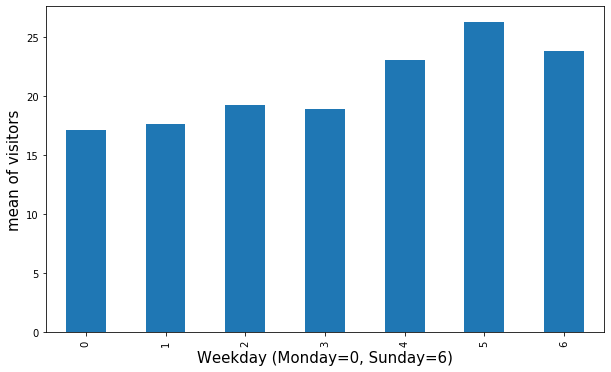

In [30]:
visitors_by_weekday = air_visits.groupby('dow')['visitors'].mean()

fig,ax = plt.subplots(figsize=(10,6))
visitors_by_weekday.plot(kind='bar', ax=ax)
plt.xlabel('Weekday (Monday=0, Sunday=6)',fontsize=15)
plt.ylabel('mean of visitors',fontsize=15)
plt.show()

- Í∏à,ÌÜ†, Ïùº ÌèâÍ∑† Î∞©Î¨∏Ïûê ÏàòÍ∞Ä Îã§Î•∏ ÎÇ†Îì§Î≥¥Îã§ ÎßéÏùÄ Ìé∏

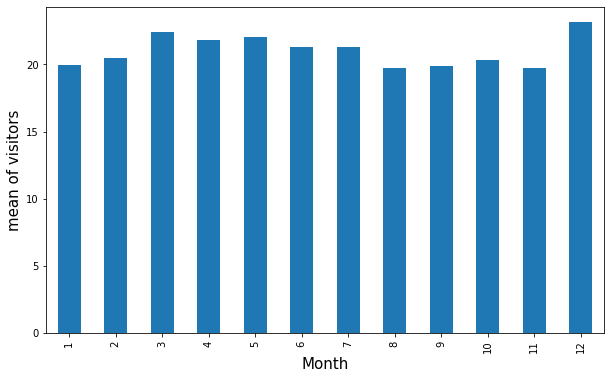

In [31]:
visitors_by_weekday = air_visits.groupby('month')['visitors'].mean()

fig,ax = plt.subplots(figsize=(10,6))
visitors_by_weekday.plot(kind='bar', ax=ax)
plt.xlabel('Month',fontsize=15)
plt.ylabel('mean of visitors',fontsize=15)
plt.show()

* Î™©Ìëú Í∏∞Í∞Ñ Î∞©Î¨∏Ïûê Ïàò Ï∂îÏù¥  
ÏòàÏ∏°Ìï† Î™©Ìëú Í∏∞Í∞ÑÏù∏ 2017ÎÖÑ 4Ïõî ÎßàÏßÄÎßâ Ï£º ~ 5ÏõîÍπåÏßÄÏùò ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ 2016ÎÖÑ 4Ïõî 15Ïùº ~ 2016ÎÖÑ 6Ïõî 15ÏùºÏùò Îç∞Ïù¥ÌÑ∞ Ï∂îÏù¥ ÌôïÏù∏

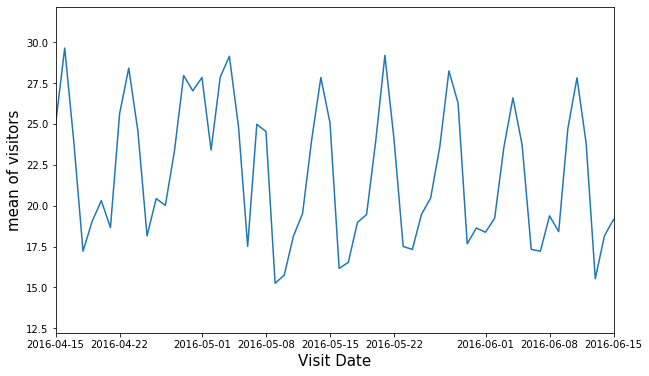

In [32]:
visitors_by_target = air_visits.groupby('visit_date')['visitors'].mean()

fig,ax = plt.subplots(figsize=(10,6))
visitors_by_target.plot(kind='line', ax=ax)
plt.xlabel('Visit Date',fontsize=15)
plt.ylabel('mean of visitors',fontsize=15)
plt.xlim(['2016-4-15', '2016-6-15'])
plt.show()

* Ïõî Í∏∞Ï§Ä Ï∞®Ìä∏Î•º Î≥¥Î©¥ 12ÏõîÏù¥ Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî Îã¨Î°ú Î≥¥Ïù¥Í≥†, 3Ïõî~5ÏõîÎèÑ Î∞©Î¨∏Í∞ùÏàòÍ∞Ä ÎÜíÏùÄ Ìé∏Ïù¥Îã§.

---

2017ÎÖÑ 4Ïõî ÎßàÏßÄÎßâ Ï£º ~ 5ÏõîÍπåÏßÄÏùò ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ 2016ÎÖÑ training data Î≥¥Î†§ÎäîÎç∞ ÎÇ†ÏßúÍ∞Ä 6Ïõî 13ÏùºÏûê Îç∞Ïù¥ÌÑ∞Îßå ÎΩëÌûàÎäî Ï§ë..8„ÖÖ8.

In [33]:
test_term_train = air_visits[air_visits["visit_date"].isin(pd.date_range('2016-04-15', '2017-06-15'))]
test_term_visitors = test_term_train.groupby('visit_date').agg({'visitors':np.sum})

In [34]:
air_visits[air_visits['visit_date'].isin(pd.date_range('2016-04-15', '2016-06-16'))]

air_store_id  visit_date  visitors  day  dow  year  month  \
89      air_ba937bf13d40fb24  2016-04-28        26   28    3  2016      4   
479     air_25e9888d30b386df  2016-04-28        20   28    3  2016      4   
480     air_25e9888d30b386df  2016-04-29        21   29    4  2016      4   
1066    air_35512c42db0868da  2016-04-28         4   28    3  2016      4   
1067    air_35512c42db0868da  2016-04-29        21   29    4  2016      4   
...                      ...         ...       ...  ...  ...   ...    ...   
250791  air_6c952e3c6e590945  2016-04-29        12   29    4  2016      4   
251206  air_0f2f96335f274801  2016-04-28        18   28    3  2016      4   
251207  air_0f2f96335f274801  2016-04-29         9   29    4  2016      4   
251559  air_c7d30ab0e07f31d5  2016-04-28        22   28    3  2016      4   
251560  air_c7d30ab0e07f31d5  2016-04-29        16   29    4  2016      4   

        week  quarter year_mth  
89        17        2   2016-4  
479       17        2   2016-4  
480       17        2   2016-4  
1066      17        2   2016-4  
1067      17        2   2016-4  
...      ...      ...      ...  
250791    17        2   2016-4  
251206    17        2   2016-4  
251207    17        2   2016-4  
251559    17        2   2016-4  
251560    17        2   2016-4  

[577 rows x 10 columns]

---

#### ÏãùÎãπ Î≥Ñ ÌèâÍ∑† Î∞©Î¨∏Ïûê Ïàò

In [35]:
air_visits.air_store_id.nunique()

829

In [36]:
air_visits.groupby('air_store_id').agg({'visitors':np.mean}).describe()

visitors
count  829.000000
mean    21.203887
std     11.774992
min      1.187500
25%     11.812010
50%     19.183406
75%     28.645161
max    115.470588

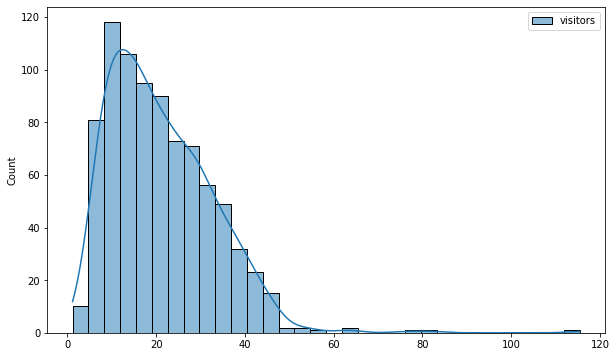

In [37]:
mean_visitor_by_res = air_visits.groupby('air_store_id').agg({'visitors':np.mean})
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(mean_visitor_by_res, kde=True)
plt.show()

#### ÏãùÎãπ Î≥Ñ ÌèâÍ∑† Î∞©Î¨∏ÏûêÏùò ÏÉÅÏûê Í∑∏Î¶º

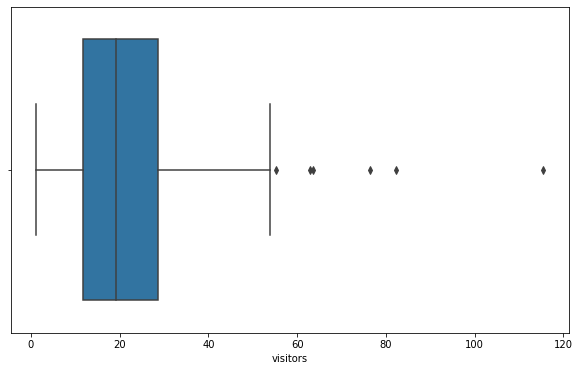

In [38]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(mean_visitor_by_res['visitors'])
plt.show()

air_visitÏùò Í∞ÄÍ≤åÏùò Ïàò:829Í∞ú<br>
Í∞Å Í∞ÄÍ≤åÎßàÎã§ ÌèâÍ∑† Î∞©Î¨∏Ïûê ÏàòÎ•º Î≥¥Î©¥ ÌèâÍ∑†Ï†ÅÏúºÎ°ú 21Î™ÖÏù¥ Í∞ÄÍ≤åÎ•º Î∞©Î¨∏ÌïòÎ©∞, ÎßéÍ≤åÎäî ÏïΩ 50~60Î™Ö, Ï†ÅÍ≤åÎäî 1Î™ÖÏù¥Îã§. Î∂ÑÌè¨Îäî ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥ê ÏûàÎäî ÌòïÌÉúÎ•º Í∞ÄÏßÑÎã§.



In [39]:
mean = pd.DataFrame(air_visits.groupby('air_store_id').agg({'visitors':np.mean}))
air_visits = pd.merge(air_visits, mean, how='left', on='air_store_id')
air_visits = air_visits.rename(columns={"visitors_x": "visitors", "visitors_y": "mean_visitors"}) # Ïª¨ÎüºÎ™Ö mean_visitorsÎ°ú Î≥ÄÍ≤Ω

In [40]:
air_visits[air_visits['mean_visitors']> 54].air_store_id.unique()

array(['air_1c0b150f9e696a5f', 'air_df554c4527a1cfe6',
       'air_9c6787aa03a45586', 'air_258dc112912fc458',
       'air_789103bf53b8096b', 'air_900d755ebd2f7bbd'], dtype=object)

IQR Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇú Ïù¥ÏÉÅÏπòÎäî Ï¥ù 6Í∞úÏùò Í∞ÄÍ≤åÏóêÏÑú ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- 'air_1c0b150f9e696a5f'
- 'air_df554c4527a1cfe6'
- 'air_9c6787aa03a45586'
- 'air_258dc112912fc458'
- 'air_789103bf53b8096b'
- 'air_900d755ebd2f7bbd'

In [41]:
air_visits[air_visits['air_store_id'] == 'air_1c0b150f9e696a5f']
air_visits[air_visits['air_store_id'] == 'air_df554c4527a1cfe6']
air_visits[air_visits['air_store_id'] == 'air_9c6787aa03a45586']
air_visits[air_visits['air_store_id'] == 'air_258dc112912fc458']
air_visits[air_visits['air_store_id'] == 'air_789103bf53b8096b']
air_visits[air_visits['air_store_id'] == 'air_900d755ebd2f7bbd']

air_store_id  visit_date  visitors  day  dow  year  month  \
158186  air_900d755ebd2f7bbd  2017-03-02         4    2    3  2017      3   
158187  air_900d755ebd2f7bbd  2017-04-01        47    1    5  2017      4   
158188  air_900d755ebd2f7bbd  2017-04-02        54    2    6  2017      4   
158189  air_900d755ebd2f7bbd  2017-04-04        79    4    1  2017      4   
158190  air_900d755ebd2f7bbd  2017-04-05        82    5    2  2017      4   
158191  air_900d755ebd2f7bbd  2017-04-06        89    6    3  2017      4   
158192  air_900d755ebd2f7bbd  2017-04-07        84    7    4  2017      4   
158193  air_900d755ebd2f7bbd  2017-04-08        67    8    5  2017      4   
158194  air_900d755ebd2f7bbd  2017-04-09        50    9    6  2017      4   
158195  air_900d755ebd2f7bbd  2017-04-11        75   11    1  2017      4   
158196  air_900d755ebd2f7bbd  2017-04-12       114   12    2  2017      4   
158197  air_900d755ebd2f7bbd  2017-04-13       111   13    3  2017      4   
158198  air_900d755ebd2f7bbd  2017-04-14       107   14    4  2017      4   
158199  air_900d755ebd2f7bbd  2017-04-15       111   15    5  2017      4   
158200  air_900d755ebd2f7bbd  2017-04-16        63   16    6  2017      4   
158201  air_900d755ebd2f7bbd  2017-04-18        93   18    1  2017      4   
158202  air_900d755ebd2f7bbd  2017-04-19       125   19    2  2017      4   
158203  air_900d755ebd2f7bbd  2017-04-20        92   20    3  2017      4   
158204  air_900d755ebd2f7bbd  2017-04-21       114   21    4  2017      4   
158205  air_900d755ebd2f7bbd  2017-04-22        83   22    5  2017      4   

        week  quarter year_mth  mean_visitors  
158186     9        1   2017-3           82.2  
158187    13        2   2017-4           82.2  
158188    13        2   2017-4           82.2  
158189    14        2   2017-4           82.2  
158190    14        2   2017-4           82.2  
158191    14        2   2017-4           82.2  
158192    14        2   2017-4           82.2  
158193    14        2   2017-4           82.2  
158194    14        2   2017-4           82.2  
158195    15        2   2017-4           82.2  
158196    15        2   2017-4           82.2  
158197    15        2   2017-4           82.2  
158198    15        2   2017-4           82.2  
158199    15        2   2017-4           82.2  
158200    15        2   2017-4           82.2  
158201    16        2   2017-4           82.2  
158202    16        2   2017-4           82.2  
158203    16        2   2017-4           82.2  
158204    16        2   2017-4           82.2  
158205    16        2   2017-4           82.2

Ï£ºÎßêÏóê Í∏âÍ≤©Ìïú Î∞©Î¨∏Ïûê ÏàòÏùò Ï¶ùÍ∞ÄÍ∞Ä ÌèâÍ∑†Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§Îã§. ÏïÑÏßÅÏùÄ Ïù¥ Î∂ÄÎ∂ÑÏù¥ Î™®Îç∏Ïóê ÎØ∏Ïπ† ÏòÅÌñ•ÏùÑ ÌååÏïÖÌïòÍ∏∞ Ïñ¥Î†§Ïö∞Îãà ÏùºÎã® Î≥¥Î•ò..

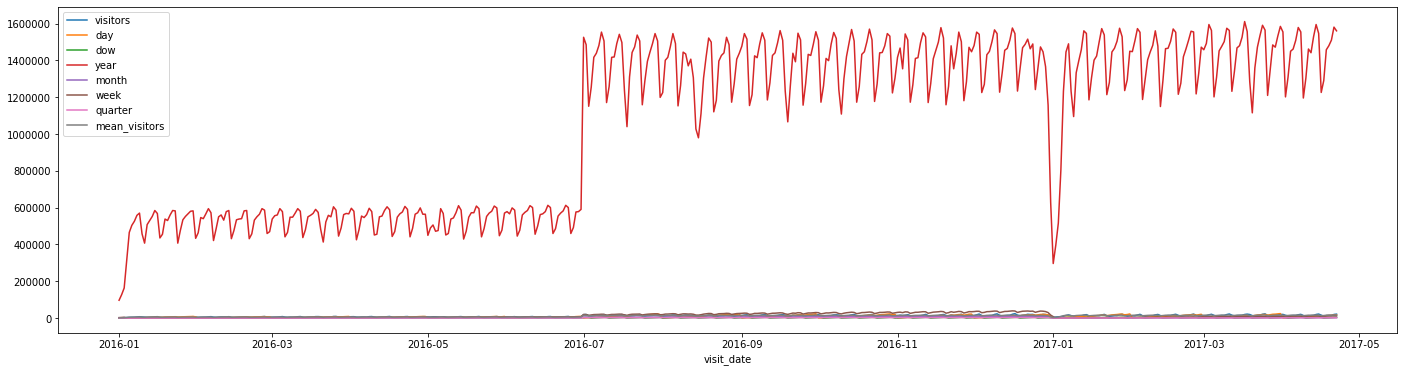

In [42]:
air_visits.groupby('visit_date').sum().plot(figsize=(24,6))

---

### 4.2 Hpg reserve

In [39]:
hpg_reserve.head()

hpg_store_id       visit_datetime     reserve_datetime  \
0  hpg_c63f6f42e088e50f  2016-01-01 11:00:00  2016-01-01 09:00:00   
1  hpg_dac72789163a3f47  2016-01-01 13:00:00  2016-01-01 06:00:00   
2  hpg_c8e24dcf51ca1eb5  2016-01-01 16:00:00  2016-01-01 14:00:00   
3  hpg_24bb207e5fd49d4a  2016-01-01 17:00:00  2016-01-01 11:00:00   
4  hpg_25291c542ebb3bc2  2016-01-01 17:00:00  2016-01-01 03:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 2  
3                 5  
4                13

In [40]:
print('Total hpg reserve visitors - ',hpg_reserve['reserve_visitors'].sum())

Total hpg reserve visitors -  10149193


#### Î†àÏä§ÌÜ†Îûë Î≥Ñ ÌèâÍ∑† ÏòàÏïΩ Î∞©Î¨∏Ïûê Ïàò

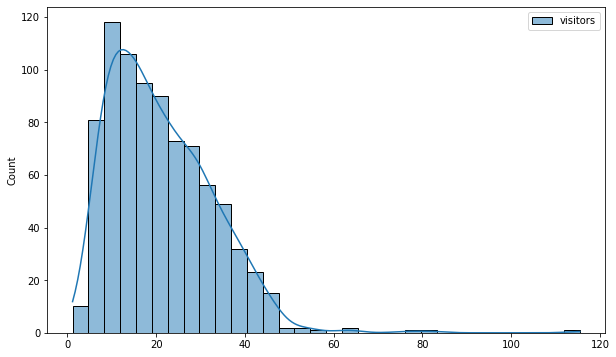

In [41]:
mean_reserve_byres = hpg_reserve.groupby('hpg_store_id').agg({'reserve_visitors':np.mean})
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(mean_visitor_by_res, kde=True)
plt.show()

In [42]:
mean_reserve_byres.describe()

reserve_visitors
count      13325.000000
mean           5.990761
std            3.955656
min            1.192857
25%            3.967742
50%            5.125000
75%            6.915493
max           84.000000

#### Î†àÏä§ÌÜ†Îûë Îãπ ÌèâÍ∑† ÏòàÏïΩ Î∞©Î¨∏Ïûê  ÏÉÅÏûê Í∑∏Î¶º

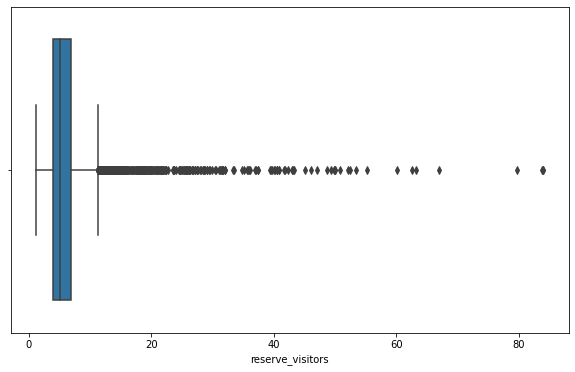

In [43]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(mean_reserve_byres['reserve_visitors'])
plt.show()

Î†àÏä§ÌÜ†Îûë Î≥Ñ ÌèâÍ∑† ÏòàÏïΩ Î∞©Î¨∏Ïûê ÏàòÎäî 5Î™Ö Ï†ïÎèÑÏù¥Î©∞, ÏòàÏïΩ Î∞©Î¨∏Ïûê ÏàòÍ∞Ä 5~12Î™Ö ÏÇ¨Ïù¥Ïù∏ ÏòàÏïΩ ÏàòÍ∞Ä ÎßéÎã§.  
IQRÎ≤îÏúÑÏù∏11.34Î™Ö Ïù¥ÏÉÅÏù∏ ÏòàÏïΩÏù¥ 575Í±¥Ïù¥ ÏûàÎã§. (Ï†ÑÏ≤¥ 13325)

In [44]:
hpg_reserve = pd.merge(hpg_reserve, mean_reserve_byres, how='left', on='hpg_store_id')
hpg_reserve = hpg_reserve.rename(columns={"reserve_visitors_x": "reserve_visitors", "reserve_visitors_y": "mean_reserve_visitors"})

In [45]:
hpg_reserve[hpg_reserve['mean_reserve_visitors']> 11.34].hpg_store_id.unique()
print(len(hpg_reserve[hpg_reserve['mean_reserve_visitors']> 11.34].hpg_store_id.unique()))

575


#### Î∞©Î¨∏ ÏãúÍ∞Å

In [46]:
hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['visit_hour'] = hpg_reserve['visit_datetime'].dt.hour

In [47]:
time_reserve = hpg_reserve.groupby('visit_hour').agg({'reserve_visitors':np.sum})

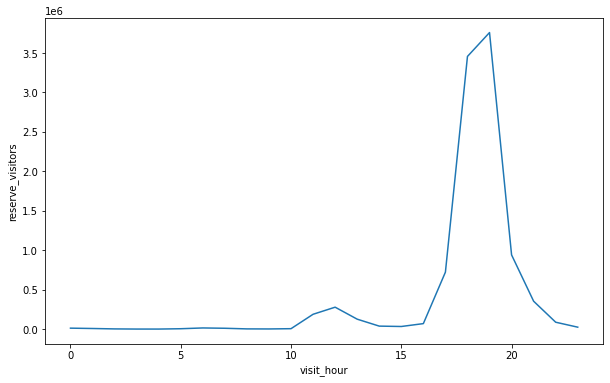

In [48]:
fig,ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='visit_hour', y='reserve_visitors', data=time_reserve)
plt.show()

Ï†ÄÎÖÅÏãúÍ∞Ñ ÏòàÏïΩÏù¥ ÎßéÎã§

### 4.3 Hpg store

#### Ïû•Î•¥Î≥Ñ Î†àÏä§ÌÜ†Îûë ÏãúÏû• Ï†êÏú†Ïú®

In [49]:
hpg_store.head()

hpg_store_id  hpg_genre_name                  hpg_area_name  \
0  hpg_6622b62385aec8bf  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   
1  hpg_e9e068dd49c5fa00  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   
2  hpg_2976f7acb4b3a3bc  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   
3  hpg_e51a522e098f024c  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   
4  hpg_e3d0e1519894f275  Japanese style  T≈çky≈ç-to Setagaya-ku Taishid≈ç   

    latitude   longitude  
0  35.643675  139.668221  
1  35.643675  139.668221  
2  35.643675  139.668221  
3  35.643675  139.668221  
4  35.643675  139.668221

In [50]:
res_by_genre = pd.DataFrame(hpg_store.groupby(['hpg_genre_name'])['hpg_store_id'].value_counts()).groupby('hpg_genre_name').agg({'hpg_store_id':np.sum})
res_by_genre.sort_values(by='hpg_store_id', ascending=False)

hpg_store_id
hpg_genre_name                            
Japanese style                        1750
International cuisine                  700
Creation                               410
Seafood                                339
Grilled meat                           325
Italian                                249
Spain Bar/Italian Bar                  229
Chinese general                         91
Japanese food in general                85
Japanese cuisine/Kaiseki                64
Creative Japanese food                  60
Karaoke                                 60
Shabu-shabu/Sukiyaki                    59
Okonomiyaki/Monja/Teppanyaki            44
Party                                   40
Korean cuisine                          38
French                                  27
Steak/Hamburger/Curry                   24
Bistro                                  22
Cafe                                    16
Sushi                                   11
Pasta/Pizza                             10
Bar/Cocktail                             7
Thai/Vietnamese food                     5
Amusement bar                            5
Western food                             5
Cantonese food                           4
Sichuan food                             3
Dim Sum/Dumplings                        2
Sweets                                   2
Spain/Mediterranean cuisine              1
Shanghai food                            1
Taiwanese/Hong Kong cuisine              1
Udon/Soba                                1

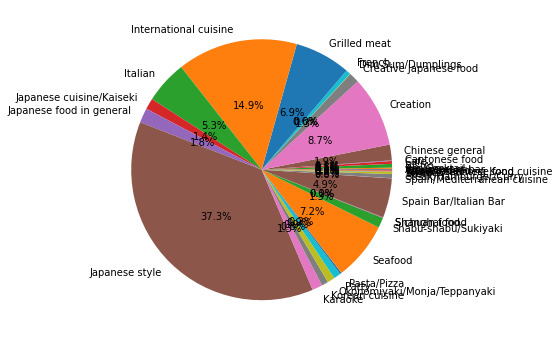

In [51]:
from matplotlib import pyplot as plt
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(res_by_genre['hpg_store_id'], labels=res_by_genre['hpg_store_id'].keys(), autopct='%0.1f%%',pctdistance=0.5)
plt.show()

hpgÏùò Î†àÏä§ÌÜ†ÎûëÏùÄ 34Í∞úÏùò Ïû•Î•¥Î°ú ÏÑ∏Î∂ÑÌôî.  
Japanese styleÏù¥ 37.3%Î°ú Í∞ÄÏû• ÎßéÏùÄ ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌïòÍ≥† International cusine 14.9%Î°ú Îëê Ïû•Î•¥Ïùò Î†àÏä§ÌÜ†ÎûëÏù¥ Ï†ÑÏ≤¥Ïùò 50Ï†ïÎèÑÎ•º Ï∞®ÏßÄÌïúÎã§.

#### Ïû•Î•¥Î≥Ñ ÏòàÏïΩÏûê Ïàò

In [52]:
hpg_full = pd.merge(hpg_reserve, hpg_store, how='left', on='hpg_store_id')
hpg_full.head()

hpg_store_id      visit_datetime     reserve_datetime  \
0  hpg_c63f6f42e088e50f 2016-01-01 11:00:00  2016-01-01 09:00:00   
1  hpg_dac72789163a3f47 2016-01-01 13:00:00  2016-01-01 06:00:00   
2  hpg_c8e24dcf51ca1eb5 2016-01-01 16:00:00  2016-01-01 14:00:00   
3  hpg_24bb207e5fd49d4a 2016-01-01 17:00:00  2016-01-01 11:00:00   
4  hpg_25291c542ebb3bc2 2016-01-01 17:00:00  2016-01-01 03:00:00   

   reserve_visitors  mean_reserve_visitors  visit_hour hpg_genre_name  \
0                 1               4.947761          11            NaN   
1                 3               2.381967          13         French   
2                 2               4.904040          16            NaN   
3                 5               8.312500          17            NaN   
4                13               3.873950          17            NaN   

             hpg_area_name   latitude   longitude  
0                      NaN        NaN         NaN  
1  Hy≈çgo-ken K≈çbe-shi None  34.692109  135.191698  
2                      NaN        NaN         NaN  
3                      NaN        NaN         NaN  
4                      NaN        NaN         NaN

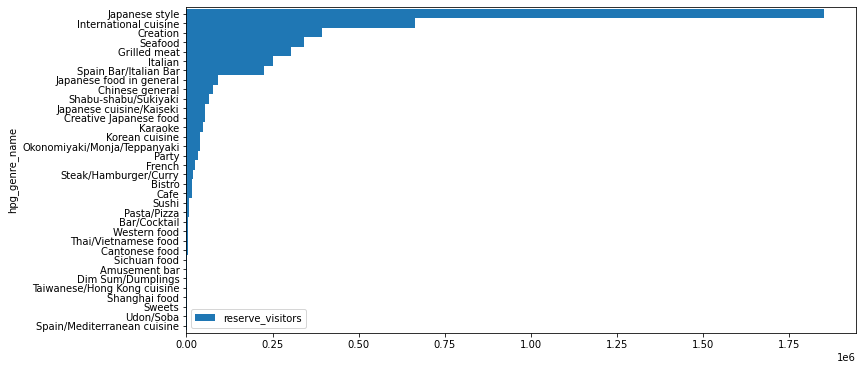

In [53]:
visitor_by_genre = hpg_full.groupby('hpg_genre_name').agg({'reserve_visitors':np.sum})
fig,ax = plt.subplots(figsize=(12,6))
visitor_by_genre.sort_values(by='reserve_visitors', ascending=True).plot(kind='barh', width=1,ax=ax)
plt.show()

Î†àÏä§ÌÜ†ÎûëÏùò ÎπÑÏ§ëÏúºÎ°ú Î≥∏ Ïù∏Í∏∞ Ïû•Î•¥ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú, ÏòàÏïΩ Î∞©Î¨∏Í∞ùÏùò ÏàòÎèÑ japanase style, international cusine, creation, seafood, grilled meat ÏàúÏúºÎ°ú Ïù∏Í∏∞Í∞Ä ÎßéÎã§.

### 4.4 air_reserve
* Data Ï†ÑÏ≤òÎ¶¨  
ÎÇ†ÏßúÎç∞Ïù¥ÌÑ∞Î•º Ïó∞/Ïõî/Ïùº/ÏöîÏùº Îì±ÏúºÎ°ú ÎÇòÎà†Ï§ÄÎã§.

In [43]:
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['day'] = air_reserve['visit_datetime'].dt.day
air_reserve['dow'] = air_reserve['visit_datetime'].dt.dayofweek
air_reserve['year'] = air_reserve['visit_datetime'].dt.year
air_reserve['month'] = air_reserve['visit_datetime'].dt.month
air_reserve['week'] = air_reserve['visit_datetime'].dt.week
air_reserve['quarter'] = air_reserve['visit_datetime'].dt.quarter
air_reserve['visit_date'] = air_reserve['visit_datetime'].dt.date
air_reserve['hour'] = air_reserve['visit_datetime'].dt.hour
air_reserve['year_mth'] = air_reserve['year'].astype(str)+'-'+air_reserve['month'].astype(str)

In [44]:
air_reserve.head()

air_store_id      visit_datetime  reserve_datetime  \
0  air_877f79706adbfb06 2016-01-01 19:00:00  2016-01-01 16:00   
1  air_db4b38ebe7a7ceff 2016-01-01 19:00:00  2016-01-01 19:00   
2  air_db4b38ebe7a7ceff 2016-01-01 19:00:00  2016-01-01 19:00   
3  air_877f79706adbfb06 2016-01-01 20:00:00  2016-01-01 16:00   
4  air_db80363d35f10926 2016-01-01 20:00:00   2016-01-01 1:00   

   reserve_visitors  day  dow  year  month  week  quarter  visit_date  hour  \
0                 1    1    4  2016      1    53        1  2016-01-01    19   
1                 3    1    4  2016      1    53        1  2016-01-01    19   
2                 6    1    4  2016      1    53        1  2016-01-01    19   
3                 2    1    4  2016      1    53        1  2016-01-01    20   
4                 5    1    4  2016      1    53        1  2016-01-01    20   

  year_mth  
0   2016-1  
1   2016-1  
2   2016-1  
3   2016-1  
4   2016-1

#### Ïõî Î≥Ñ ÏòàÏïΩ Ï∂îÏù¥  
* Í∞Å Ïõî Î≥Ñ Î™áÎ™ÖÏù¥ ÏòàÏïΩÌñàÎäîÏßÄ ÏãúÍ∞ÅÌôî
* 2016ÎÖÑÏùò ÏòàÏïΩÏùÄ Ï†ÄÏ°∞Ìïú Ìé∏Ïù¥Í≥†, ÏïΩ 2016ÎÖÑ 7Ïõî Î∂ÄÌÑ∞ 2016ÎÖÑ 11ÏõîÍπåÏßÄ ÏòàÏïΩÏù¥ ÏóÜÎäî Íµ¨Í∞ÑÎèÑ Ï°¥Ïû¨
* 2017ÎÖÑÏóê Í∞ÄÍπåÏõåÏßàÏàòÎ°ù ÏòàÏïΩÏù¥ Ìè≠Î∞úÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïúÎã§.
* Îã®, 2017ÎÖÑ 1ÏõîÏóê ÏòàÏïΩÏù¥ Í∏âÍ∞êÌïòÎäî Íµ¨Í∞ÑÏù¥ Ï°¥Ïû¨ÌïúÎã§.

Text(0, 0.5, 'Reservation')

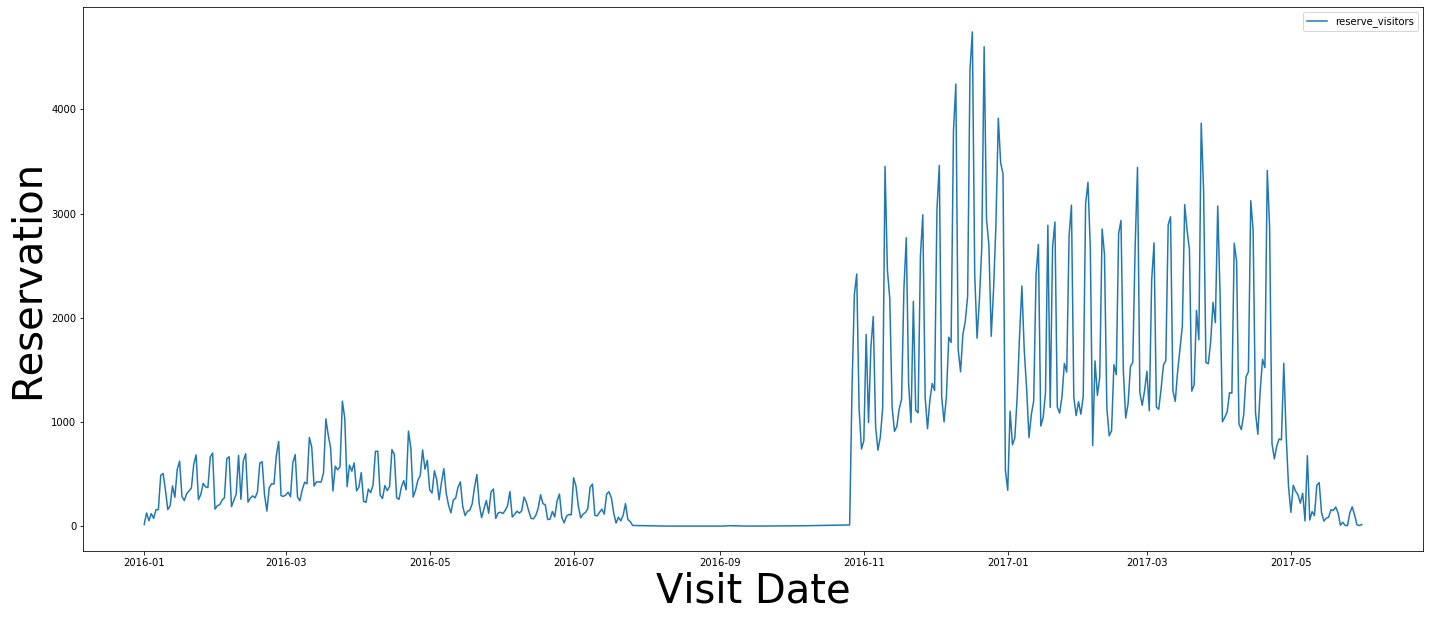

In [45]:
visitors_by_date = air_reserve.groupby(['visit_date']).agg({'reserve_visitors':np.sum})
fig, ax = plt.subplots(figsize=(24,10))
visitors_by_date.plot(kind='line', ax=ax)
plt.xlabel('Visit Date', fontsize = 40)
plt.ylabel('Reservation', fontsize = 40)

#### ÏòàÏïΩ ÏãúÍ∞Ñ Ï∂îÏù¥
* Ï£ºÎ°ú Ï†ÄÎÖÅÏãúÍ∞ÑÎåÄÏóê ÏòàÏïΩÏùÑ ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÎåÄÎã§ÏàòÎ•º Ï∞®ÏßÄÌïúÎã§.

Text(0, 0.5, 'Reservation')

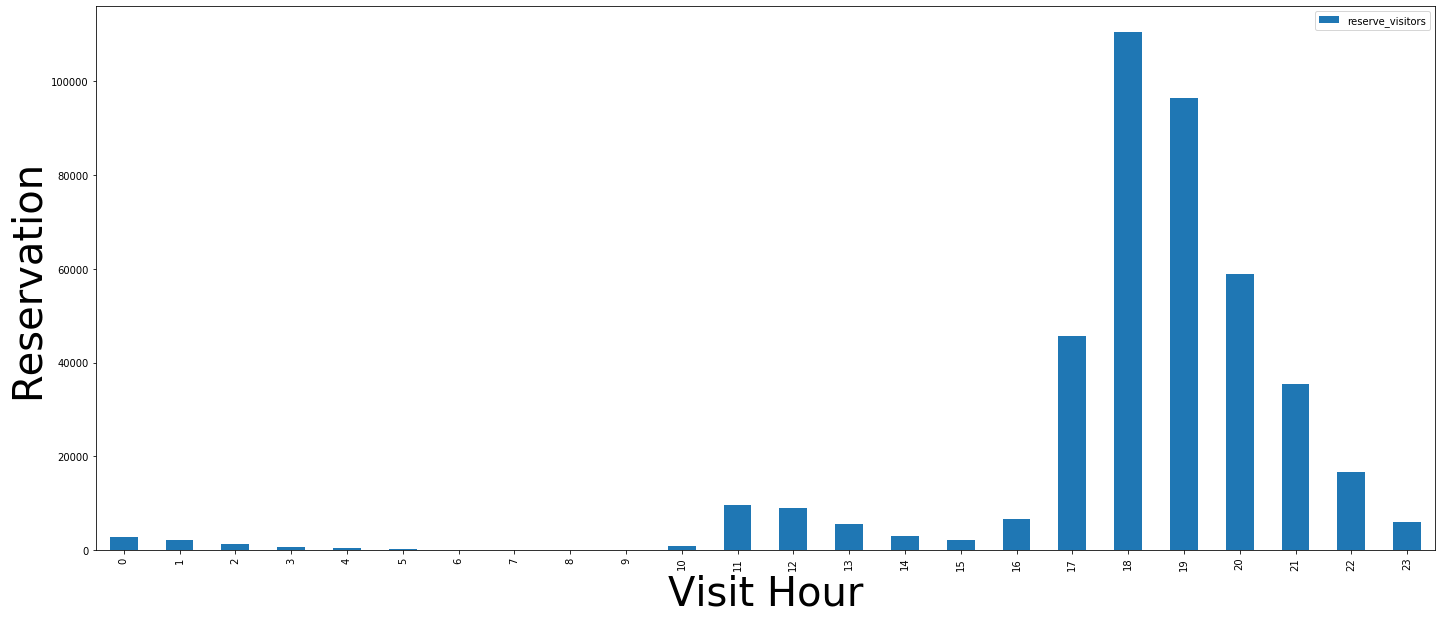

In [46]:
visitors_by_hour = air_reserve.groupby(['hour']).agg({'reserve_visitors':np.sum})
fig, ax = plt.subplots(figsize=(24,10))
visitors_by_hour.plot(kind='bar', ax=ax)
plt.xlabel('Visit Hour', fontsize = 40)
plt.ylabel('Reservation', fontsize = 40)

#### ÏòàÏïΩ ÏöîÏùº Ï∂îÏù¥
* Ïã§Ï†ú Î∞©Î¨∏ÏûêÍ∞Ä ÌÜ†,ÏùºÏöîÏùºÏóê ÎßéÏïòÎçò Í≤ÉÏóê ÎπÑÌï¥ ÏòàÏïΩÏùÄ ÏõîÏöîÏùºÍ≥º ÏàòÏöîÏùº, Í∏àÏöîÏùºÏóê Í∞ÄÏû• ÎßéÏù¥ ÏòàÏïΩÎêêÎã§.

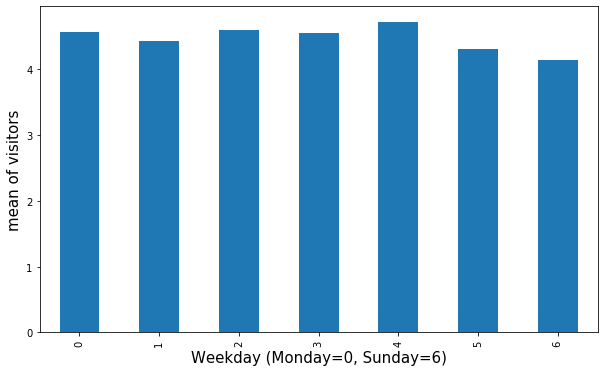

In [48]:
visitors_by_weekday = air_reserve.groupby('dow')['reserve_visitors'].mean()

fig,ax = plt.subplots(figsize=(10,6))
visitors_by_weekday.plot(kind='bar', ax=ax)
plt.xlabel('Weekday (Monday=0, Sunday=6)',fontsize=15)
plt.ylabel('mean of visitors',fontsize=15)
plt.show()

#### Ïõî Î≥Ñ ÌèâÍ∑† ÏòàÏïΩ Ïàò Ï∂îÏù¥
* 2016ÎÖÑ 8, 9Ïõî, 2017ÎÖÑ 5ÏõîÏùÑ Ï†úÏô∏ÌïòÍ≥†Îäî Í±∞Ïùò ÎπÑÏä∑Ìïú ÏàòÏ§ÄÏùò ÌèâÍ∑† ÏòàÏïΩ ÏàòÎ•º Î≥¥Ïù∏Îã§.
* 2016ÎÖÑÏùò ÏòàÏïΩÏù¥ ÏóÜÎçò Íµ¨Í∞ÑÏúºÎ°ú Ïù∏Ìï¥ ÌèâÍ∑† ÏòàÏïΩ ÏàòÍ∞Ä ÎÇÆÍ≤å Ï∏°Ï†ïÎêú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
* 2016ÎÖÑ ÎßêÎ∂ÄÌÑ∞ ÏòàÏïΩÏù¥ Ìè≠Î∞úÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌñàÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïõî Î≥Ñ ÌèâÍ∑†ÏùÄ Ï†ÅÎãπÌïú ÏàòÏ§ÄÏùÑ Ïú†ÏßÄÌïúÎã§.
* Îã®, 2017ÎÖÑ 5ÏõîÏùò Í≤ΩÏö∞ Îã§Î•∏ Îïå Î≥¥Îã§ 2Î∞∞Ï†ïÎèÑ ÎÜíÏùÄ ÏòàÏïΩÎ•†ÏùÑ Î≥¥Ïù∏Îã§.

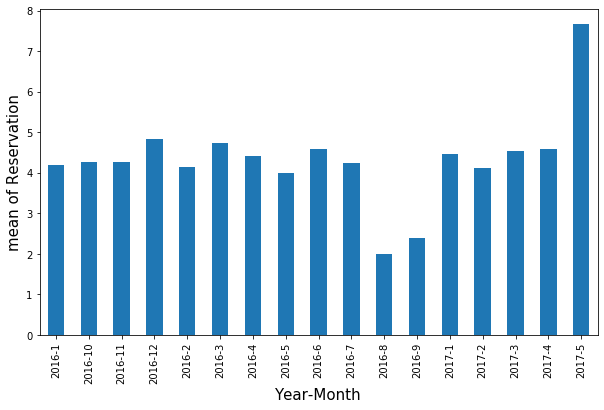

In [50]:
visitors_by_month = air_reserve.groupby('year_mth')['reserve_visitors'].mean()

fig,ax = plt.subplots(figsize=(10,6))
visitors_by_month.plot(kind='bar', ax=ax)
plt.xlabel('Year-Month',fontsize=15)
plt.ylabel('mean of Reservation',fontsize=15)
plt.show()

### 4.5 Air store

In [51]:
air_store.head()

air_store_id  air_genre_name                 air_area_name  \
0  air_0f0cdeee6c9bf3d7  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
1  air_7cc17a324ae5c7dc  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
2  air_fee8dcf4d619598e  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
3  air_a17f0778617c76e2  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
4  air_83db5aff8f50478e  Italian/French  T≈çky≈ç-to Minato-ku Shibak≈çen   

    latitude   longitude  
0  34.695124  135.197852  
1  34.695124  135.197852  
2  34.695124  135.197852  
3  34.695124  135.197852  
4  35.658068  139.751599

#### Mapping

In [52]:
def draw_map(df, title):
    plt.figure(figsize=(11,6))
    map = Basemap(resolution='i',llcrnrlon=127, urcrnrlon=147,
                  llcrnrlat=29, urcrnrlat=47, lat_0=0, lon_0=0,)
    map.shadedrelief()
    map.drawcoastlines()
    map.drawcountries(linewidth = 3)
    map.drawstates(color='0.3')
    parallels = np.arange(0.,360,10.,)
    map.drawparallels(parallels, labels = [True for s in range(len(parallels))])
    meridians = np.arange(0.,360,10.,)
    map.drawmeridians(meridians, labels = [True for s in range(len(meridians))])
    #______________________
    # put restaurants on map
    for index, (y,x) in df[['latitude','longitude']].iterrows():
        x, y = map(x, y)
        map.plot(x, y, marker='o', markersize = 5, markeredgewidth = 1, color = 'red',
                 markeredgecolor='k')
    plt.title(title, y = 1.05)

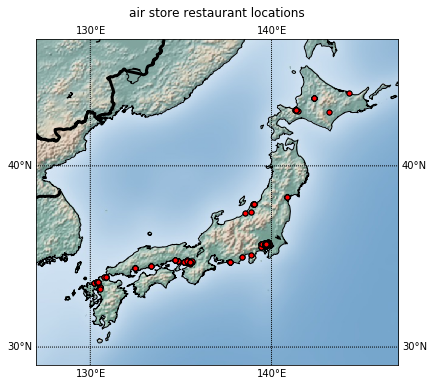

In [53]:
draw_map(air_store, 'air store restaurant locations')

#### ÏóÖÏ¢Ö Î≥Ñ Í∞ÄÍ≤å Ïàò

In [55]:
res_by_genre = pd.DataFrame(air_store.groupby(['air_genre_name'])['air_store_id'].value_counts()).groupby('air_genre_name').agg({'air_store_id':np.sum})
res_by_genre = res_by_genre.sort_values(by='air_store_id', ascending=False)
res_by_genre

air_store_id
air_genre_name                            
Izakaya                                197
Cafe/Sweets                            181
Dining bar                             108
Italian/French                         102
Bar/Cocktail                            79
Japanese food                           63
Other                                   27
Yakiniku/Korean food                    23
Western food                            16
Okonomiyaki/Monja/Teppanyaki            14
Creative cuisine                        13
Asian                                    2
International cuisine                    2
Karaoke/Party                            2

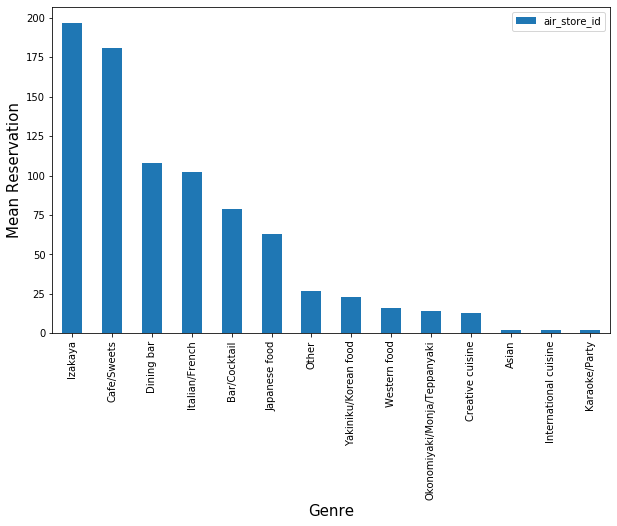

In [56]:
fig,ax = plt.subplots(figsize=(10,6))
res_by_genre.plot(kind='bar', ax=ax)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Mean Reservation',fontsize=15)
plt.show()

#### ÏßÄÏó≠ Î≥Ñ Í∞ÄÍ≤å Ïàò

In [58]:
res_by_area = pd.DataFrame(air_store.groupby(['air_area_name'])['air_store_id'].value_counts()).groupby('air_area_name').agg({'air_store_id':np.sum})
res_by_area = res_by_area.sort_values(by='air_store_id', ascending=False)
res_by_area

air_store_id
air_area_name                                   
Fukuoka-ken Fukuoka-shi Daimy≈ç                64
T≈çky≈ç-to Shibuya-ku Shibuya                   58
T≈çky≈ç-to Minato-ku Shibak≈çen                  51
T≈çky≈ç-to Shinjuku-ku Kabukich≈ç                39
T≈çky≈ç-to Setagaya-ku Setagaya                 30
...                                          ...
T≈çky≈ç-to Shibuya-ku D≈çgenzaka                  2
T≈çky≈ç-to Shibuya-ku Higashi                    2
T≈çky≈ç-to Shibuya-ku Jing≈´mae                   2
T≈çky≈ç-to Chiyoda-ku Kanda Jinb≈çch≈ç             2
T≈çky≈ç-to Kita-ku ≈åjihonch≈ç                     2

[103 rows x 1 columns]

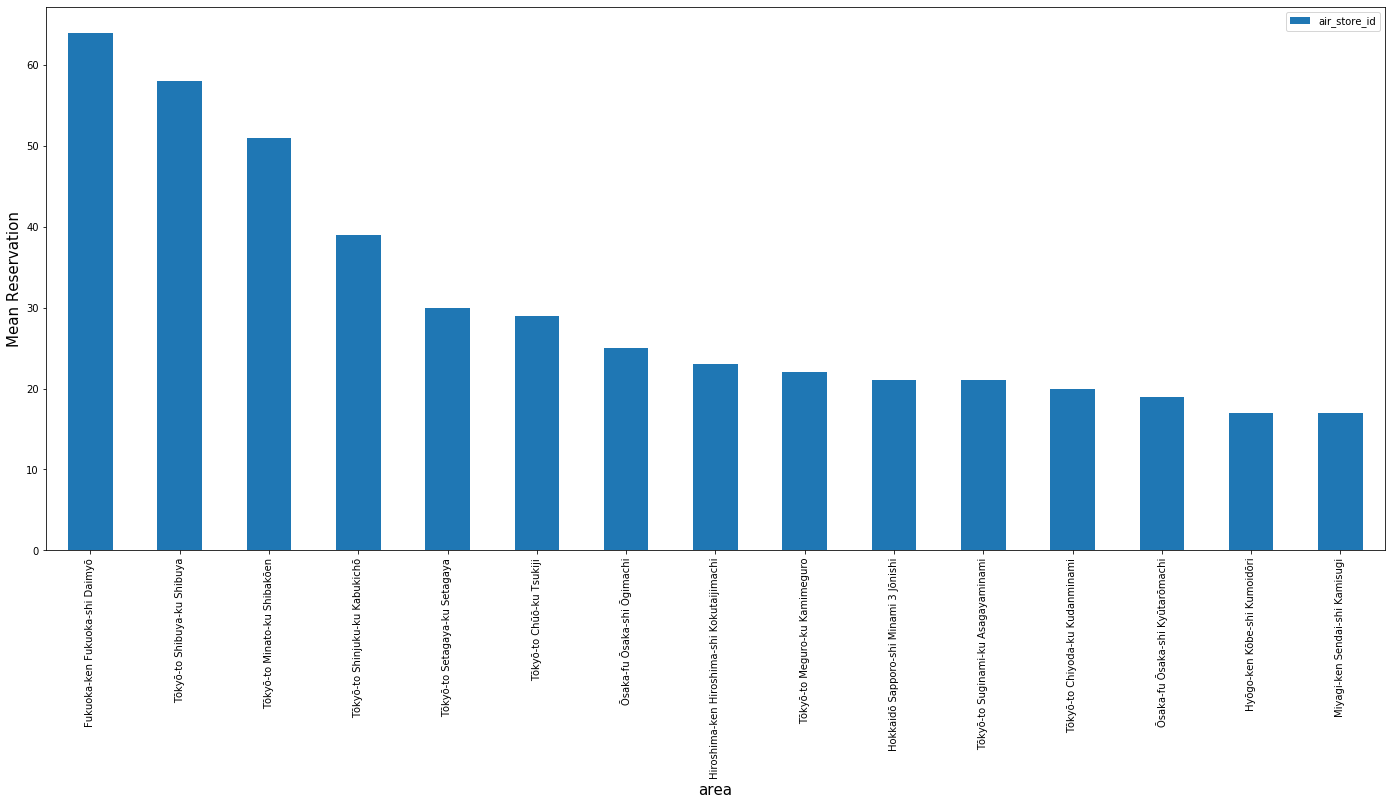

In [59]:
fig,ax = plt.subplots(figsize=(24,10))
res_by_area.head(15).plot(kind='bar', ax=ax)
plt.xlabel('area',fontsize=15)
plt.ylabel('Mean Reservation',fontsize=15)
plt.show()

### 4.6 Holiday

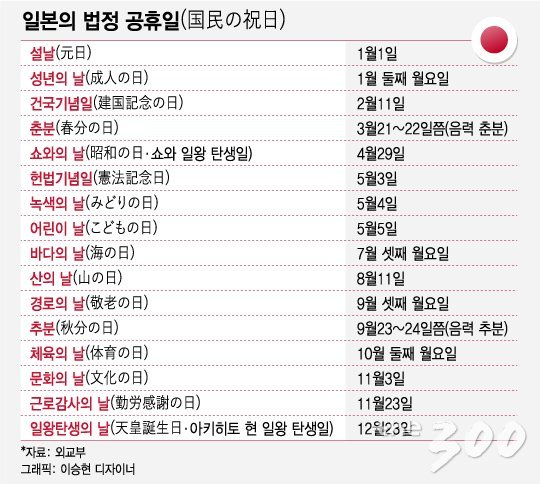
* ÏùºÎ≥∏ Í≥µÌú¥ÏùºÏùò ÌäπÏßï   
  * ÏùºÏöîÏùºÍ≥º Í≥µÌú¥ÏùºÏù¥ Í≤πÏπ† Í≤ΩÏö∞ Í∑∏ Îã§Ïùå ÌèâÏùºÏùÑ Ìú¥ÏùºÎ°ú ÌïòÎäî ÎåÄÏ≤¥ Ìú¥Ïùº Ï†úÎèÑÎ•º Ïã§ÏãúÌïòÍ≥† ÏûàÎã§
  * Í≥µÌú¥ÏùºÏ§ëÏóêÏÑú ÏÑ±Ïù∏Ïùò ÎÇ†, Î∞îÎã§Ïùò ÎÇ†, Í≤ΩÎ°úÏùò ÎÇ†, Ï≤¥Ïú°Ïùò ÎÇ†ÏùÄ Ìï¥Ìîº Î®ºÎç∞Ïù¥ Ï†úÎèÑÍ∞Ä Ï†ÅÏö©ÎêòÏñ¥ Ìï≠ÏÉÅ ÏõîÏöîÏùºÏù¥Îã§.
  * Îß§ÎÖÑ 4ÏõîÎßê-5Ïõî Ï¥à Ï¶àÏùå Í≥®Îì†ÏúÑÌÅ¨Í∞Ä ÏûàÏäµÎãàÎã§.   
      2016 : 4/27-5/5   
      2017 : 4/27-5/5
* ÏÉùÍ∞ÅÌï¥Î≥ºÎßåÌïú Í≤É
    * ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÎäî ÎÇ†Ïßú, Î¨∏ÏûêÏó¥ÌÉÄÏûÖÏùÄ ÎÇòÏ§ëÏóê Í≥ÑÏÇ∞ Í∞ÄÎä•Ìïú ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥ÏïºÌï† Í≤É Í∞ôÎã§
    * day_of_weekÍ∞ôÏùÄ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Îäî Label EncodingÏù¥ÎÇò One-Hot EncodingÏùÑ ÏÇ¨Ïö©?
    * xÏõî xÏùº Ï≤òÎüº ÏßÄÏ†ïÎêú Ìú¥Ïùº Ïô∏Ïóê 'xÏõî xÏß∏ xÏöîÏùº' Í∞ôÏùÄ Ìú¥Ïùº()Ïù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î™áÏß∏Ï£ºÏù∏ÏßÄÏóê ÎåÄÌïú Ï†ïÎ≥¥ÎèÑ Ï∂îÍ∞ÄÎêòÎ©¥ Ï¢ãÏùÑ ÎìØ?   
    * ÏùåÎ†•ÏùÑ Í≥†Î†§Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏùÑÍπå?
    * ÏùºÎ∞ò Ìú¥ÏùºÎ≥¥Îã§ Ïó∞Ìú¥Ïùº ÎïåÎäî Î∞©Î¨∏ÏûêÍ∞Ä Îçî ÎßéÏùÑÍπå?

#### air_visit_dataÏôÄ date_infoÏùò Í¥ÄÍ≥Ñ

In [62]:
air_visit_with_date_info = pd.merge(air_visits, date_info, left_on="visit_date", right_on="calendar_date")
air_visit_with_date_info.drop(["calendar_date"], axis=1, inplace=True)
air_visit_with_date_info.head()

air_store_id  visit_date  visitors day_of_week  holiday_flg
0  air_ba937bf13d40fb24  2016-01-13        25   Wednesday            0
1  air_25e9888d30b386df  2016-01-13        21   Wednesday            0
2  air_fd6aac1043520e83  2016-01-13        40   Wednesday            0
3  air_64d4491ad8cdb1c6  2016-01-13         5   Wednesday            0
4  air_ee3a01f0c71a769f  2016-01-13        18   Wednesday            0

#### ÏöîÏùºÏóê Îî∞Îùº Î∞©Î¨∏ÏûêÏùò ÏàòÍ∞Ä Îã¨ÎùºÏßàÍπå?

<AxesSubplot:xlabel='visit_day_of_week'>

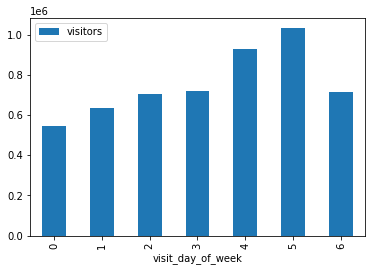

In [63]:
air_visit_with_date_info['visit_day_of_week'] = pd.to_datetime(air_visit_with_date_info['visit_date']).dt.dayofweek

air_visit_with_date_info.loc[:,["visit_day_of_week", "visitors"]] \
                            .groupby("visit_day_of_week") \
                            .sum() \
                            .plot(kind="bar")


* Í∏à/ÌÜ† ÏöîÏùºÏóê Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÍ≥† ÏõîÏöîÏùº Î∞©Î¨∏ÏûêÍ∞Ä Ï†ÅÎã§
* ÏùºÏöîÏùºÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§ Î∞©Î¨∏ÏûêÍ∞Ä ÌäπÎ≥ÑÌûà ÎßéÏßÄ ÏïäÎã§
* Ìú¥ÏùºÎ≥¥Îã§ Ìú¥Ïùº Ï†ÑÎÇ†Ïóê Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏùÄ Í≤ÉÏùÄ ÏïÑÎãêÍπå? (Ï†ÄÎÖÅÏïΩÏÜç?)
* ÏõîÏöîÏùºÏù¥ ÌäπÌûà Î∞©Î¨∏ÏûêÍ∞Ä Ï†ÅÏùÄ Í≤ÉÏùÄ Ìú¥Ïùº Îã§ÏùåÎÇ†Ïù¥Í∏∞ ÎïåÎ¨∏ÏùºÍπå?   
  ÎßåÏïΩ Í∑∏Î†áÎã§Î©¥ ÏùºÏöîÏùºÏù¥ ÏïÑÎãå Ìú¥Ïùº Îã§ÏùåÎÇ†ÎèÑ Î∞©Î¨∏ÏûêÍ∞Ä Ï†ÅÏùÑÍπå?

#### ÌèâÏùºÍ≥º Ï£ºÎßêÏùò ÌèâÍ∑† Î∞©Î¨∏ÏûêÎäî Ï∞®Ïù¥Í∞Ä ÎÇ†Íπå?

<AxesSubplot:>

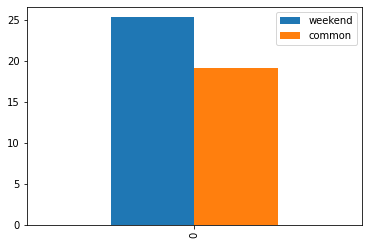

In [64]:
# ÌÜ†/ÏùºÏöîÏùºÏùÑ Ï£ºÎßêÎ°ú Î∂ÑÎ•ò
air_visit_with_date_info['weekend_flg'] = ((air_visit_with_date_info['visit_day_of_week']>4)).astype(int)

temp_df = pd.DataFrame()

query = "weekend_flg == 1"
temp_df["weekend"] = [air_visit_with_date_info.query(query)["visitors"].mean()]

query = "holiday_flg == 0 & weekend_flg == 0"
temp_df["common"] = [air_visit_with_date_info.query(query)["visitors"].mean()]

temp_df.plot(kind="bar")

#### Í∏à-ÌÜ†ÏöîÏùºÏù¥ ÌÜ†-ÏùºÏöîÏùºÎ≥¥Îã§ ÌèâÍ∑† Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏùÄÍ∞Ä?

<AxesSubplot:>

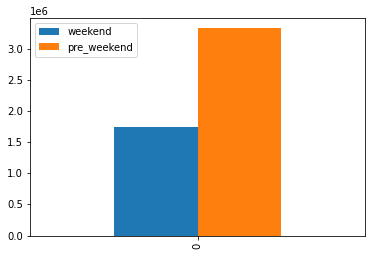

In [65]:
air_visit_with_date_info['pre_weekend_flg'] = ((air_visit_with_date_info['visit_day_of_week']>3) & (air_visit_with_date_info['visit_day_of_week']<6)).astype(int)

temp_df = pd.DataFrame()

query = "weekend_flg == 1"
temp_df["weekend"] = [air_visit_with_date_info.query(query)["visitors"].sum()]

query = "pre_weekend_flg == 0"
temp_df["pre_weekend"] = [air_visit_with_date_info.query(query)["visitors"].sum()]

temp_df.plot(kind="bar")

* Ï£ºÎßêÎ≥¥Îã§ Í∏à-ÌÜ†ÏöîÏùºÏù¥ Î∞©Î¨∏Ïûê ÏàòÍ∞Ä Ìõ®Ïî¨ ÎßéÎã§(Í∞ÄÎùºÏò§ÏºÄÎÇò Ïà†Ïßë Îì±Ïùò ÏòÅÌñ•Ïù∏Í∞Ä?)

#### Ï£ºÎßêÏù¥ ÏïÑÎãå Í≥µÌú¥ÏùºÏóêÎäî ÌèâÍ∑†Ï†ÅÏúºÎ°ú Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏùÑÍπå?

<AxesSubplot:>

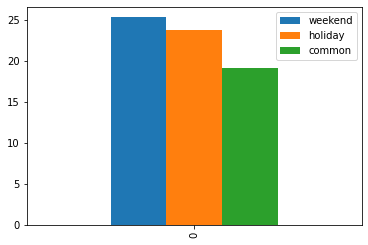

In [66]:
temp_df = pd.DataFrame()

query = "weekend_flg == 1"
temp_df["weekend"] = [air_visit_with_date_info.query(query)["visitors"].mean()]

query = "holiday_flg == 1"
temp_df["holiday"] = [air_visit_with_date_info.query(query)["visitors"].mean()]

query = "holiday_flg == 0 & weekend_flg == 0"
temp_df["common"] = [air_visit_with_date_info.query(query)["visitors"].mean()]

temp_df.plot(kind="bar")

* ÌèâÏùºÏóê ÎπÑÌïòÎ©¥ Í≥µÌú¥ÏùºÏóê Î∞©Î¨∏ÏûêÍ∞Ä Îçî ÎßéÎã§
* Ï£ºÎßê > Ìú¥Ïùº > ÌèâÏùº ÏàúÏúºÎ°ú Î∞©Î¨∏Í∞ùÏù¥ ÎßéÎã§.

#### Ìú¥Ïùº Ï†ÑÎÇ†ÏùÄ Í∏à-ÌÜ†Ïùò ÏÇ¨Î°ÄÏ≤òÎüº Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏùÑÍπå?

<AxesSubplot:>

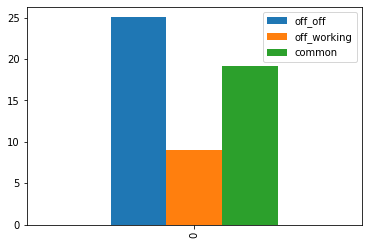

In [67]:
air_visit_with_date_info['off_day_flg'] = ((air_visit_with_date_info['weekend_flg']==1) | (air_visit_with_date_info['holiday_flg']==1)).astype(int)
air_visit_with_date_info['next_day_is_off_day'] = air_visit_with_date_info['off_day_flg'].shift(-1,fill_value=0).astype(int)

temp_df = pd.DataFrame()

query = "next_day_is_off_day == 1"
temp_df["off_off"] = [air_visit_with_date_info.query(query)["visitors"].mean()]
query = "off_day_flg == 1 & next_day_is_off_day==0"
temp_df["off_working"] = [air_visit_with_date_info.query(query)["visitors"].mean()]
query = "off_day_flg == 0"
temp_df["common"] = [air_visit_with_date_info.query(query)["visitors"].mean()]


temp_df.plot(kind="bar")

* Îã§ÏùåÎÇ†Ïù¥ Ìú¥ÏùºÏù∏ Í≤ΩÏö∞ Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏïòÎã§
* Ïò§ÎäòÏù¥ Ìú¥ÏùºÏù∏Îç∞ Îã§ÏùåÎÇ†Ïù¥ Ìú¥ÏùºÏù¥ ÏïÑÎãå Í≤ΩÏö∞ ÌèâÍ∑†Ï†ÅÏúºÎ°ú Î∞©Î¨∏ÏûêÍ∞Ä Ï†ÅÏóàÎã§

#### Í≥®Îì†ÏúÑÌÅ¨ÏóêÎäî Îã§Î•∏ Ìú¥ÏùºÎì§Î≥¥Îã§ Î∞©Î¨∏ÏûêÍ∞Ä Îçî ÎßéÏùÑÍπå?
* 2016ÎÖÑ Í≥®Îì†ÏúÑÌÅ¨Îäî 4/27-5/5

<AxesSubplot:>

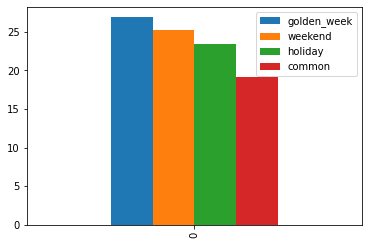

In [68]:
air_visit_with_date_info['off_day_flg'] = ((air_visit_with_date_info['weekend_flg']==1) | (air_visit_with_date_info['holiday_flg']==1)).astype(int)

air_visit_with_date_info['golden_week_flg'] = ((air_visit_with_date_info['visit_date']>='2016-04-29') & (air_visit_with_date_info['visit_date']<='2016-05-05')).astype(int)

temp_df = pd.DataFrame()

query = "golden_week_flg == 1"
temp_df["golden_week"] = [air_visit_with_date_info.query(query)["visitors"].mean()]
query = "weekend_flg == 1 & golden_week_flg==0"
temp_df["weekend"] = [air_visit_with_date_info.query(query)["visitors"].mean()]
query = "holiday_flg == 1 & golden_week_flg==0"
temp_df["holiday"] = [air_visit_with_date_info.query(query)["visitors"].mean()]
query = "off_day_flg == 0 & golden_week_flg==0"
temp_df["common"] = [air_visit_with_date_info.query(query)["visitors"].mean()]


temp_df.plot(kind="bar")

* Í≥®Îì†ÏúÑÌÅ¨ Í∏∞Í∞ÑÏóêÎäî Í∑∏Î†áÏßÄ ÏïäÏùÄ Ìú¥ÏùºÎ≥¥Îã§ ÌäπÌûà Îçî ÎßéÏùÄ Î∞©Î¨∏ÏûêÍ∞Ä Î∞©Î¨∏ÌïúÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

#### Ïó∞Ìú¥ÏóêÎäî Î∞©Î¨∏ÏûêÍ∞Ä Îçî ÎßéÏùÑÍπå?

<AxesSubplot:>

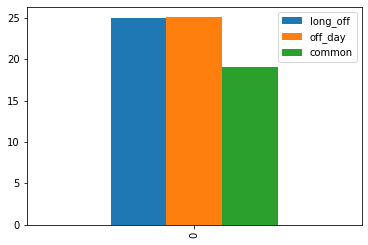

In [69]:
# 3Ïùº Ïù¥ÏÉÅ Ïó∞ÏÜçÏúºÎ°ú Ïâ¥ Í≤ΩÏö∞ Ïó∞Ìú¥Î°ú ÌåêÎã®Ìï©ÎãàÎã§
date_info['day_of_week'] = pd.to_datetime(date_info['calendar_date']).dt.dayofweek
date_info['weekend_flg'] = ((date_info['day_of_week']>4)).astype(int)
date_info['off_day_flg'] = ((date_info['weekend_flg']==1) | (date_info['holiday_flg']==1)).astype(int)


def true_runs(a):
    iszero = np.concatenate(([0], np.equal(a, 1).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

date_info['long_off_flg'] = 0
continues_off_list = true_runs(date_info['off_day_flg'])

for i in continues_off_list:
    if i[1]-i[0]>=3:
        date_info.loc[i[0]:i[1]-1,'long_off_flg'] = 1
        
air_visit_with_long_off_info = pd.merge(air_visits, date_info, left_on="visit_date", right_on="calendar_date")
air_visit_with_long_off_info.drop(["calendar_date"], axis=1, inplace=True)
air_visit_with_long_off_info.head()

temp_df = pd.DataFrame()

query = "long_off_flg == 1"
temp_df["long_off"] = [air_visit_with_long_off_info.query(query)["visitors"].mean()]
query = "off_day_flg == 1 & long_off_flg==0"
temp_df["off_day"] = [air_visit_with_long_off_info.query(query)["visitors"].mean()]
query = "off_day_flg == 0"
temp_df["common"] = [air_visit_with_long_off_info.query(query)["visitors"].mean()]


temp_df.plot(kind="bar")

* Ïó∞Ìú¥ÎùºÍ≥† Îã§Î•∏ Ìú¥ÏùºÎì§Î≥¥Îã§ Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏßÄÎäî ÏïäÎã§

#### date_info Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥∏ Í≤∞Í≥º
* Í∏à/ÌÜ† ÏöîÏùºÏóê Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÍ≥† ÏõîÏöîÏùº Î∞©Î¨∏ÏûêÍ∞Ä Ï†ÅÎã§
* ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÌèâÏùºÏóê ÎπÑÌïòÎ©¥ Ï£ºÎßêÏóê Î∞©Î¨∏ÏûêÍ∞Ä Îçî ÎßéÎã§
* ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÌèâÏùºÏóê ÎπÑÌïòÎ©¥ Í≥µÌú¥ÏùºÏóê Î∞©Î¨∏ÏûêÍ∞Ä Îçî ÎßéÎã§
* ÌèâÍ∑†Ï†ÅÏúºÎ°ú Ï£ºÎßê > Ìú¥Ïùº > ÌèâÏùº ÏàúÏúºÎ°ú Î∞©Î¨∏Í∞ùÏù¥ ÎßéÎã§.
* ÌèâÍ∑†Ï†ÅÏúºÎ°ú Í≥®Îì†ÏúÑÌÅ¨ Í∏∞Í∞ÑÏóêÎäî Í∑∏Î†áÏßÄ ÏïäÏùÄ Ìú¥ÏùºÎ≥¥Îã§ ÌäπÌûà Îçî ÎßéÏùÄ Î∞©Î¨∏ÏûêÍ∞Ä Î∞©Î¨∏ÌïúÎã§.
* Ïó∞Ìú¥ÎùºÍ≥† Îã§Î•∏ Ìú¥ÏùºÎì§Î≥¥Îã§ Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏßÄÎäî ÏïäÎã§
* Îã§Ïùå ÎÇ†Ïù¥ Ìú¥ÏùºÏù∏ Í≤ΩÏö∞ Í∑∏Î†áÏßÄ ÏïäÏùÄ ÎÇ†Îì§Î≥¥Îã§ Î∞©Î¨∏ÏûêÍ∞Ä Îçî ÎßéÏïòÎã§
* Îã§ÏùåÎÇ†Ïù¥ Ï£ºÎßêÏù∏ Í≤ΩÏö∞ Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏïòÎã§
* Ïò§ÎäòÏù¥ Ìú¥ÏùºÏù∏Îç∞ Îã§ÏùåÎÇ†Ïù¥ Ìú¥ÏùºÏù¥ ÏïÑÎãå Í≤ΩÏö∞ ÌèâÍ∑†Ï†ÅÏúºÎ°ú Î∞©Î¨∏ÏûêÍ∞Ä Ï†ÅÏóàÎã§

## 5. Modeling

### Load libraries

In [24]:
# import libraries
import time
import calendar
import numpy as np
import pandas as pd
from dateutil.parser import parse
from datetime import date, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

import os

%matplotlib inline

# config
DATA_DIR = './data/'

# define utility funtions
def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

calendar.setfirstweekday(6)
def get_week_of_month(date_str):
    year = int(date_str[:4])
    month = int(date_str[5:7])
    day = int(date_str[8:10])
    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x==day)[0][0] + 1
    return(week_of_month)

### Load data

In [25]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
air_visit = pd.read_csv(os.path.join(DATA_DIR, 'air_visit_data.csv'))
air_reserve = pd.read_csv(os.path.join(DATA_DIR, 'air_reserve.csv'))
hpg_reserve = pd.read_csv(os.path.join(DATA_DIR, 'hpg_reserve.csv'))
air_store = pd.read_csv(os.path.join(DATA_DIR, 'air_store_info.csv'))
hpg_store = pd.read_csv(os.path.join(DATA_DIR, 'hpg_store_info.csv'))
store_id_map = pd.read_csv(os.path.join(DATA_DIR, 'store_id_relation.csv'))
date_info = pd.read_csv(os.path.join(DATA_DIR, 'date_info.csv'))
submission = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))

In [26]:
# Ï†ÑÏ≤òÎ¶¨Î•º ÌïúÎ≤àÏóê ÌïòÍ∏∞ÏúÑÌï¥ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
air_visit_count = len(air_visit)

train_data = air_visit.copy()
test_data = submission.copy()

test_data["air_store_id"] = test_data.apply(lambda x: '_'.join(x['id'].split('_')[:2]), axis=1)
test_data["visit_date"] = test_data.apply(lambda x:x['id'].split("_")[-1], axis=1)
test_data.drop("id",axis=1, inplace=True)

concat_data = pd.concat([train_data, test_data])
concat_data

air_store_id  visit_date  visitors
0      air_ba937bf13d40fb24  2016-01-13        25
1      air_ba937bf13d40fb24  2016-01-14        32
2      air_ba937bf13d40fb24  2016-01-15        29
3      air_ba937bf13d40fb24  2016-01-16        22
4      air_ba937bf13d40fb24  2016-01-18         6
...                     ...         ...       ...
32014  air_fff68b929994bfbd  2017-05-27         0
32015  air_fff68b929994bfbd  2017-05-28         0
32016  air_fff68b929994bfbd  2017-05-29         0
32017  air_fff68b929994bfbd  2017-05-30         0
32018  air_fff68b929994bfbd  2017-05-31         0

[284127 rows x 3 columns]

### Merge tables

### holiday

In [27]:
# ÌïôÏäµÏãúÌÇ¨ Îç∞Ïù¥ÌÑ∞Ïóê holidays Îç∞Ïù¥ÌÑ∞ merge
concat_data = pd.merge(concat_data, date_info, how="left", left_on="visit_date", right_on="calendar_date")
concat_data.drop("calendar_date", axis=1, inplace=True)
concat_data.head()

air_store_id  visit_date  visitors day_of_week  holiday_flg
0  air_ba937bf13d40fb24  2016-01-13        25   Wednesday            0
1  air_ba937bf13d40fb24  2016-01-14        32    Thursday            0
2  air_ba937bf13d40fb24  2016-01-15        29      Friday            0
3  air_ba937bf13d40fb24  2016-01-16        22    Saturday            0
4  air_ba937bf13d40fb24  2016-01-18         6      Monday            0

### merge store_info

In [28]:
print(len(air_store))
print(len(store_id_map))

829
150


* air_storeÏôÄ Îß§Ïπ≠Ïù¥ ÎêòÎäî hpg_storeÏùò Í∞ØÏàòÍ∞Ä 150Í∞úÎ∞ñÏóê ÎêòÏßÄ ÏïäÎäîÎã§. ÎÇòÏ§ëÏóê Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï† ÎìØ

In [29]:
concat_data = pd.merge(concat_data, air_store, how="left", on="air_store_id")
concat_data = pd.merge(concat_data, store_id_map, how="left", on="air_store_id")
concat_data = pd.merge(concat_data, hpg_store, how="left", on="hpg_store_id")
concat_data.head()

air_store_id  visit_date  visitors day_of_week  holiday_flg  \
0  air_ba937bf13d40fb24  2016-01-13        25   Wednesday            0   
1  air_ba937bf13d40fb24  2016-01-14        32    Thursday            0   
2  air_ba937bf13d40fb24  2016-01-15        29      Friday            0   
3  air_ba937bf13d40fb24  2016-01-16        22    Saturday            0   
4  air_ba937bf13d40fb24  2016-01-18         6      Monday            0   

  air_genre_name                 air_area_name  latitude_x  longitude_x  \
0     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   
1     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   
2     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   
3     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   
4     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   

  hpg_store_id hpg_genre_name hpg_area_name  latitude_y  longitude_y  
0          NaN            NaN           NaN         NaN          NaN  
1          NaN            NaN           NaN         NaN          NaN  
2          NaN            NaN           NaN         NaN          NaN  
3          NaN            NaN           NaN         NaN          NaN  
4          NaN            NaN           NaN         NaN          NaN

### merge reservation

In [30]:
# ÏòàÏïΩÎç∞Ïù¥ÌÑ∞Îäî visit_date Í∏∞Ï§ÄÏúºÎ°ú air, hpgÏóêÏÑúÏùò ÏòàÏïΩÏù¥ Í∞ÅÍ∞Å Î™áÌåÄ ÏûàÎäîÏßÄ, ÏòàÏïΩÏù∏ÏõêÏùÄ Î™áÎ™ÖÏù∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º merge
air_reserve_data = air_reserve.copy()
air_reserve_data["visit_datetime"] = air_reserve_data["visit_datetime"].str[:10]
air_reserve_data = air_reserve_data[["air_store_id", "visit_datetime", "reserve_visitors"]] \
                        .groupby(by=["air_store_id", 'visit_datetime']) \
                        .sum() \
                        .reset_index()
air_reserve_data = air_reserve_data.rename(columns = {'reserve_visitors': 'air_reserve_visitors'})
air_reserve_data = air_reserve_data.rename(columns = {'visit_datetime': 'visit_date'})

pd.merge(concat_data, air_reserve_data, how="left", on=['air_store_id', 'visit_date'])
 
concat_data = pd.merge(concat_data, air_reserve_data, how="left", on=['air_store_id', 'visit_date'])

In [31]:
hpg_reserve_data = hpg_reserve.copy()
hpg_reserve_data["visit_datetime"] = hpg_reserve_data["visit_datetime"].str[:10]
hpg_reserve_data = hpg_reserve_data[["hpg_store_id", "visit_datetime", "reserve_visitors"]] \
                        .groupby(by=["hpg_store_id", 'visit_datetime']) \
                        .sum() \
                        .reset_index()
hpg_reserve_data = hpg_reserve_data.rename(columns = {'reserve_visitors': 'hpg_reserve_visitors'})
hpg_reserve_data = hpg_reserve_data.rename(columns = {'visit_datetime': 'visit_date'})
hpg_reserve_data["visit_date"] = hpg_reserve_data["visit_date"].str[:10]

concat_data = pd.merge(concat_data, hpg_reserve_data, how="left", on=['hpg_store_id', 'visit_date'])

In [32]:
concat_data.head()

air_store_id  visit_date  visitors day_of_week  holiday_flg  \
0  air_ba937bf13d40fb24  2016-01-13        25   Wednesday            0   
1  air_ba937bf13d40fb24  2016-01-14        32    Thursday            0   
2  air_ba937bf13d40fb24  2016-01-15        29      Friday            0   
3  air_ba937bf13d40fb24  2016-01-16        22    Saturday            0   
4  air_ba937bf13d40fb24  2016-01-18         6      Monday            0   

  air_genre_name                 air_area_name  latitude_x  longitude_x  \
0     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   
1     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   
2     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   
3     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   
4     Dining bar  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599   

  hpg_store_id hpg_genre_name hpg_area_name  latitude_y  longitude_y  \
0          NaN            NaN           NaN         NaN          NaN   
1          NaN            NaN           NaN         NaN          NaN   
2          NaN            NaN           NaN         NaN          NaN   
3          NaN            NaN           NaN         NaN          NaN   
4          NaN            NaN           NaN         NaN          NaN   

   air_reserve_visitors  hpg_reserve_visitors  
0                   NaN                   NaN  
1                   NaN                   NaN  
2                   NaN                   NaN  
3                   NaN                   NaN  
4                   NaN                   NaN

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [33]:
concat_data.isna().sum()

air_store_id                 0
visit_date                   0
visitors                     0
day_of_week                  0
holiday_flg                  0
air_genre_name               0
air_area_name                0
latitude_x                   0
longitude_x                  0
hpg_store_id            232258
hpg_genre_name          261572
hpg_area_name           261572
latitude_y              261572
longitude_y             261572
air_reserve_visitors    254932
hpg_reserve_visitors    270247
dtype: int64

In [34]:
# Ï§ëÎ≥µÎêòÎäî ÌîºÏ≥ê Ï†úÍ±∞
concat_data = concat_data.drop(["hpg_area_name", "hpg_genre_name", "latitude_y", "longitude_y"], axis=1)

In [36]:
query = "air_reserve_visitors.notnull() and hpg_reserve_visitors.notnull() and air_reserve_visitors!=hpg_reserve_visitors"
concat_data.query(query,engine='python').head()

air_store_id  visit_date  visitors day_of_week  holiday_flg  \
4669  air_3e93f3c81008696d  2016-10-27        48    Thursday            0   
4670  air_3e93f3c81008696d  2016-10-28        25      Friday            0   
4671  air_3e93f3c81008696d  2016-10-29        42    Saturday            0   
4673  air_3e93f3c81008696d  2016-11-01        76     Tuesday            0   
4676  air_3e93f3c81008696d  2016-11-04         5      Friday            0   

                    air_genre_name  \
4669  Okonomiyaki/Monja/Teppanyaki   
4670  Okonomiyaki/Monja/Teppanyaki   
4671  Okonomiyaki/Monja/Teppanyaki   
4673  Okonomiyaki/Monja/Teppanyaki   
4676  Okonomiyaki/Monja/Teppanyaki   

                                   air_area_name  latitude_x  longitude_x  \
4669  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   
4670  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   
4671  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   
4673  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   
4676  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   

              hpg_store_id  air_reserve_visitors  hpg_reserve_visitors  
4669  hpg_c2a8494d55fafbd6                  12.0                   2.0  
4670  hpg_c2a8494d55fafbd6                   4.0                   2.0  
4671  hpg_c2a8494d55fafbd6                  17.0                  28.0  
4673  hpg_c2a8494d55fafbd6                  74.0                   3.0  
4676  hpg_c2a8494d55fafbd6                  11.0                   7.0

In [37]:
query = "air_reserve_visitors.notnull() and hpg_reserve_visitors.notnull() and air_reserve_visitors==hpg_reserve_visitors"
concat_data.query(query,engine='python').head()

air_store_id  visit_date  visitors day_of_week  holiday_flg  \
4678  air_3e93f3c81008696d  2016-11-07         9      Monday            0   
4728  air_3e93f3c81008696d  2017-01-10         9     Tuesday            0   
4748  air_3e93f3c81008696d  2017-02-06        46      Monday            0   
4778  air_3e93f3c81008696d  2017-03-13        90      Monday            0   
4796  air_3e93f3c81008696d  2017-04-03        12      Monday            0   

                    air_genre_name  \
4678  Okonomiyaki/Monja/Teppanyaki   
4728  Okonomiyaki/Monja/Teppanyaki   
4748  Okonomiyaki/Monja/Teppanyaki   
4778  Okonomiyaki/Monja/Teppanyaki   
4796  Okonomiyaki/Monja/Teppanyaki   

                                   air_area_name  latitude_x  longitude_x  \
4678  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   
4728  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   
4748  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   
4778  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   
4796  Hiroshima-ken Hiroshima-shi Kokutaijimachi   34.386244   132.455018   

              hpg_store_id  air_reserve_visitors  hpg_reserve_visitors  
4678  hpg_c2a8494d55fafbd6                   2.0                   2.0  
4728  hpg_c2a8494d55fafbd6                   2.0                   2.0  
4748  hpg_c2a8494d55fafbd6                   4.0                   4.0  
4778  hpg_c2a8494d55fafbd6                  26.0                  26.0  
4796  hpg_c2a8494d55fafbd6                   8.0                   8.0

* air_reserve_visitorsÏôÄ hpg_reserve_visitorsÍ∞Ä Í∞ôÏùÄ ÎÇ†Ïù¥ ÍΩ§ ÎßéÏùÄ Ï†êÏù¥ Ïù¥ÏÉÅÌïòÏßÄÎßå Îã§Î•∏ ÎÇ†Ïù¥ 2Î∞∞ Ïù¥ÏÉÅÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏùºÎã® ÎÑòÏñ¥Í∞ÑÎã§

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [38]:
concat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284127 entries, 0 to 284126
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   air_store_id          284127 non-null  object 
 1   visit_date            284127 non-null  object 
 2   visitors              284127 non-null  int64  
 3   day_of_week           284127 non-null  object 
 4   holiday_flg           284127 non-null  int64  
 5   air_genre_name        284127 non-null  object 
 6   air_area_name         284127 non-null  object 
 7   latitude_x            284127 non-null  float64
 8   longitude_x           284127 non-null  float64
 9   hpg_store_id          51869 non-null   object 
 10  air_reserve_visitors  29195 non-null   float64
 11  hpg_reserve_visitors  13880 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 28.2+ MB


* air_store_id, visit_date, day_of_week, air_genre_name, air_area_name Ïª¨ÎüºÏùÄ Ïó∞ÏÇ∞ÏùÑ Ìï† Ïàò ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ ÌòïÌÉúÎ°ú ÎêòÏñ¥ÏûàÎã§

In [39]:
# dayofweek : monday(0)~sunday(6)
# ÎÇ†ÏßúÎç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
concat_data['visit_date'] = pd.to_datetime(concat_data['visit_date'])
concat_data['visit_day_of_week'] = pd.to_datetime(concat_data['visit_date']).dt.dayofweek
concat_data['day'] = concat_data['visit_date'].dt.day
concat_data['dow'] = concat_data['visit_date'].dt.weekday # monday:0, sunday:6
concat_data['year'] = concat_data['visit_date'].dt.year
concat_data['month'] = concat_data['visit_date'].dt.month
concat_data['week'] = concat_data['visit_date'].dt.week
concat_data['quarter'] = concat_data['visit_date'].dt.quarter
concat_data['visit_date'] = concat_data['visit_date'].dt.date

# Ï£ºÎßê Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä 
concat_data['weekend_flg'] = ((concat_data['visit_day_of_week']>4)).astype(int)

# ÏùºÎ≥∏ Ìú¥ÏùºÏùò ÌäπÏÑ±(Ìï¥ÌîºÎ®ºÎç∞Ïù¥)ÏÉÅ ÎÇ†ÏßúÍ∞Ä Ìï¥Îãπ Ïõî Î™áÏß∏Ï£ºÏù∏ÏßÄÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÍ∞ÄÌï©ÎãàÎã§
concat_data["visit_week_of_month"] = concat_data["visit_date"].apply(str).apply(get_week_of_month)

# ÏöîÏùºÏùÑ ÏõêÌï´Ïù∏ÏΩîÎî©
concat_data = pd.get_dummies(concat_data, columns = ['day_of_week'], prefix="", prefix_sep='')

# Ï£ºÎßê/Í≥µÌú¥Ïùº Í¥ÄÍ≥Ñ ÏóÜÏù¥ Ïâ¨Îäî ÎÇ†Ïóê ÎåÄÌïú Ïª¨Îüº Ï∂îÍ∞Ä
concat_data['off_day_flg'] = ((concat_data['weekend_flg']==1) | (concat_data['holiday_flg']==1)).astype(int)

# Îã§ÏùåÎÇ†Ïù¥ Ìú¥ÏùºÏù∏ÏßÄ ÌåêÎã®Ìï† Ïàò ÏûàÎäî Ïª¨Îüº Ï∂îÍ∞Ä
concat_data['next_day_is_off'] = concat_data['off_day_flg'].shift(-1,fill_value=0).astype(int)

# Í≥®Îì†ÏúÑÌÅ¨ ÌîåÎûòÍ∑∏ Ï∂îÍ∞Ä
# 2016 Í≥®Îì†ÏúÑÌÅ¨Îäî 4/29~5/5Ïùº
# 2017 Í≥®Îì†ÏúÑÌÅ¨Îäî 4/29~5/5Ïùº
concat_data['golden_week_flg'] = ( \
                                  ((concat_data['visit_date'].apply(str)>='2016-04-29') & (concat_data['visit_date'].apply(str)<='2016-05-05')) | \
                                  ((concat_data['visit_date'].apply(str)>='2017-04-29') & (concat_data['visit_date'].apply(str)<='2017-05-05'))
                                 ).astype(int)

concat_data.head(1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


air_store_id  visit_date  visitors  holiday_flg air_genre_name  \
0  air_ba937bf13d40fb24  2016-01-13        25            0     Dining bar   

                  air_area_name  latitude_x  longitude_x hpg_store_id  \
0  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599          NaN   

   air_reserve_visitors  ...  Friday  Monday  Saturday  Sunday  Thursday  \
0                   NaN  ...       0       0         0       0         0   

   Tuesday  Wednesday  off_day_flg  next_day_is_off  golden_week_flg  
0        0          1            0                0                0  

[1 rows x 30 columns]

In [40]:
# ÏÉÅÏ†êÎ≥Ñ Í∞Å ÏöîÏùº Î∞©Î¨∏Ïûê ÌÜµÍ≥ÑÎ•º featureÎ°ú Ï∂îÍ∞Ä

unique_stores = test_data['air_store_id'].unique()#extract unique stores id from test data

store_7days = pd.concat([pd.DataFrame({'air_store_id': unique_stores, 'dow': [i]*len(unique_stores)}) 
                    for i in range(7)], axis=0, ignore_index=True).reset_index(drop=True)
# store_7days
# air_store_id : Í∞Å ÏÉÅÏ†êÏùò Í≥†Ïú†Í∞í
# dow : ÏöîÏùº(0~6)

# store_7days
store_sum = pd.DataFrame({'air_store_id': unique_stores})

# mapping concat data dow to stores(test data) - min, mean, median, max, count 
tmp = concat_data.groupby(['air_store_id'], as_index=False)[
    'visitors'].sum().rename(columns={'visitors':'total_visitors'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id']) 
tmp = concat_data.groupby(['air_store_id','dow'], as_index=False)[
    'visitors'].mean().rename(columns={'visitors':'mean_visitors'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id','dow'])
tmp = concat_data.groupby(['air_store_id','dow'], as_index=False)[
    'visitors'].median().rename(columns={'visitors':'median_visitors'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id','dow'])
tmp = concat_data.groupby(['air_store_id','dow'], as_index=False)[
    'visitors'].max().rename(columns={'visitors':'max_visitors'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id','dow'])
tmp = concat_data.groupby(['air_store_id','dow'], as_index=False)[
    'visitors'].count().rename(columns={'visitors':'count_observations'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id','dow']) 

# store_7days
# concat_data
concat_data = pd.merge(concat_data, store_7days, how='left', on=['air_store_id','dow'])

concat_data["total_visitors"] = concat_data["total_visitors"].fillna(0)
concat_data["mean_visitors"] = concat_data["mean_visitors"].fillna(0)
concat_data["median_visitors"] = concat_data["median_visitors"].fillna(0)
concat_data["max_visitors"] = concat_data["max_visitors"].fillna(0)
concat_data["count_observations"] = concat_data["count_observations"].fillna(0)

In [41]:
# ÏÉÅÏ†êÎ≥Ñ ÏßÅÏ†Ñ Î∂ÑÍ∏∞ ÎåÄÎπÑ Ï¶ùÍ∞êÏú® ÌîºÏ≥ê Ï∂îÍ∞Ä
qoq= concat_data.groupby(['air_store_id','year','quarter'])['visitors'].sum()
qoq=qoq.unstack(0)
qoq=pd.DataFrame(qoq.to_records())
qoq=qoq.transpose()
qoq.drop(['year','quarter'],inplace=True)
qoq['2016Q2']=qoq[1]/qoq[0]*100
qoq['2016Q3']=qoq[2]/qoq[1]*100
qoq['2016Q4']=qoq[3]/qoq[2]*100
qoq['2017Q1']=qoq[4]/qoq[3]*100
lst=['2016Q2','2016Q3','2016Q4','2017Q1']
qoq=qoq[lst]
qoq['qoq_count']=qoq.apply(lambda x: x.count(), axis=1) 
qoq['qoq_growth']=qoq.apply(lambda x: x[x>100].count(), axis=1)
qoq['qoq_growth_pct'] = round(qoq['qoq_growth'] /qoq['qoq_count'],2)
qoq.index.names=['air_store_id']
qoq.reset_index(inplace=True)
qoq = qoq.fillna(0) #change to one for algo training

concat_data = pd.merge(concat_data, qoq, how='left', on='air_store_id')

In [42]:
# Í∏à/ÌÜ†ÏöîÏùºÏù∏ÏßÄ? (EDA Ï∞∏Í≥†)
concat_data['pre_weekend_flg'] = ((concat_data['visit_day_of_week']>3) & (concat_data['visit_day_of_week']<6)).astype(int)

# Ìú¥ÏùºÏùò Ï†Ñ ÎÇ†Ïù∏ÏßÄ? (EDA Ï∞∏Í≥†)
concat_data['off_day_flg'] = ((concat_data['weekend_flg']==1) | (concat_data['holiday_flg']==1)).astype(int)
concat_data['next_day_is_off_day'] = concat_data['off_day_flg'].shift(-1,fill_value=0).astype(int)

# Îã§Ïùå ÎÇ†Ïù¥ ÌèâÏùºÏù∏ Ìú¥ÏùºÏù∏ÏßÄ (EDA Ï∞∏Í≥†)
concat_data["today_off_next_day_working"] =  ((concat_data['off_day_flg']==1) | (concat_data['next_day_is_off_day']==0)).astype(int)


In [43]:
# air_genre_name Ï≤òÎ¶¨

# ÏõêÌï´Ïù∏ÏΩîÎî©
concat_data = pd.get_dummies(concat_data, columns = ['air_genre_name'], prefix="", prefix_sep='')

# Label Encoding
# le = LabelEncoder()
# concat_data["en_air_genre_name"] = le.fit_transform(concat_data['air_genre_name'])
# concat_data = concat_data.drop("air_genre_name", axis=1)
# concat_data.head()

In [44]:
# air_area_name Ï≤òÎ¶¨

concat_data["area_1"] = concat_data["air_area_name"].str.split(" ").str[0]
concat_data["area_2"] = concat_data["air_area_name"].str.split(" ").str[1]
concat_data["area_3"] = concat_data["air_area_name"].str.split(" ").str[2]

concat_data = pd.get_dummies(concat_data, columns = ['area_1'], prefix="", prefix_sep='')
concat_data = pd.get_dummies(concat_data, columns = ['area_2'], prefix="", prefix_sep='')
concat_data = pd.get_dummies(concat_data, columns = ['area_3'], prefix="", prefix_sep='')

# le1 = LabelEncoder()
# concat_data["en_area_1"] = le1.fit_transform(concat_data['area_1'])
# le2 = LabelEncoder()
# concat_data["en_area_2"] = le2.fit_transform(concat_data['area_2'])
# le3 = LabelEncoder()
# concat_data["en_area_3"] = le3.fit_transform(concat_data['area_3'])

concat_data.head()

air_store_id  visit_date  visitors  holiday_flg  \
0  air_ba937bf13d40fb24  2016-01-13        25            0   
1  air_ba937bf13d40fb24  2016-01-14        32            0   
2  air_ba937bf13d40fb24  2016-01-15        29            0   
3  air_ba937bf13d40fb24  2016-01-16        22            0   
4  air_ba937bf13d40fb24  2016-01-18         6            0   

                  air_area_name  latitude_x  longitude_x hpg_store_id  \
0  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599          NaN   
1  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599          NaN   
2  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599          NaN   
3  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599          NaN   
4  T≈çky≈ç-to Minato-ku Shibak≈çen   35.658068   139.751599          NaN   

   air_reserve_visitors  hpg_reserve_visitors  ...  Toyotamakita  Tsukiji  \
0                   NaN                   NaN  ...             0        0   
1                   NaN                   NaN  ...             0        0   
2                   NaN                   NaN  ...             0        0   
3                   NaN                   NaN  ...             0        0   
4                   NaN                   NaN  ...             0        0   

   T≈çy≈ç  T≈çy≈çch≈ç  Yasuda  ≈ågimachi  ≈åhiraki  ≈åjihonch≈ç  ≈åted≈çri  ≈åtemachi  
0     0        0       0         0        0          0        0         0  
1     0        0       0         0        0          0        0         0  
2     0        0       0         0        0          0        0         0  
3     0        0       0         0        0          0        0         0  
4     0        0       0         0        0          0        0         0  

[5 rows x 221 columns]

### Ïù¥ÏÉÅÏπò ÌôïÏù∏

In [50]:
# visitorsÏùò Î∂ÑÌè¨Í∞Ä ÏïΩÍ∞Ñ Ïù¥ÏÉÅÌï¥ Î≥¥Ïó¨ÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§
air_visit.sort_values(by="visitors", ascending=False).head()

air_store_id  visit_date  visitors
85314   air_cfdeb326418194ff  2017-03-08       877
214825  air_8c3175aa5e4fc569  2017-04-18       777
72836   air_f2985de32bb792e0  2016-07-10       675
172123  air_eca5e0064dc9314a  2016-08-30       627
143894  air_43d577e0c9460e64  2016-01-24       514

* Ìïú ÏÉÅÏ†êÏùò Î∞©Î¨∏ÏûêÎßå ÌäπÎ≥ÑÌûà ÎÜíÎã§(Ïù¥ÏÉÅÏπò)Í∏∞ Î≥¥Îã§Îäî Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏùÄ Î†àÏä§ÌÜ†ÎûëÏù¥ Î™á Í≥≥ ÏûàÎäî Í≤É Í∞ôÏäµÎãàÎã§   
    visitorsÎäî ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê train / test Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìïú ÌõÑ Ï†ïÍ∑úÌôîÍ∞Ä ÌïÑÏöîÌï† Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

In [ ]:
# air_reserve_visitorsÏùò Î∂ÑÌè¨ÎèÑ ÏïΩÍ∞Ñ Ïù¥ÏÉÅÌï¥ Î≥¥Ïó¨ÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§
concat_data.sort_values("air_reserve_visitors").tail()

* air_stor_idÍ∞Ä air_e7fbee4e3cfe65c5 2017Ïõî 02Ïõî 05ÏùºÏóê ÏòàÏïΩÏûêÍ∞Ä ÎÑàÎ¨¥ ÎßéÏïÑÎ≥¥ÏûÖÎãàÎã§. Ïù¥ÏÉÅÏπòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§

In [53]:
query = "air_store_id=='air_e7fbee4e3cfe65c5' and visit_datetime.str.contains('2017-02-05')"
air_reserve.query(query, engine="python")

air_store_id       visit_datetime     reserve_datetime  \
58288  air_e7fbee4e3cfe65c5  2017-02-05 17:00:00  2016-09-05 13:00:00   
58289  air_e7fbee4e3cfe65c5  2017-02-05 17:00:00  2016-09-06 16:00:00   
58290  air_e7fbee4e3cfe65c5  2017-02-05 17:00:00  2016-09-18 00:00:00   
58291  air_e7fbee4e3cfe65c5  2017-02-05 17:00:00  2016-09-22 20:00:00   
58292  air_e7fbee4e3cfe65c5  2017-02-05 17:00:00  2016-09-05 21:00:00   
...                     ...                  ...                  ...   
58745  air_e7fbee4e3cfe65c5  2017-02-05 23:00:00  2016-03-29 14:00:00   
58746  air_e7fbee4e3cfe65c5  2017-02-05 23:00:00  2016-04-03 16:00:00   
58747  air_e7fbee4e3cfe65c5  2017-02-05 23:00:00  2016-04-17 23:00:00   
58748  air_e7fbee4e3cfe65c5  2017-02-05 23:00:00  2016-04-05 23:00:00   
58749  air_e7fbee4e3cfe65c5  2017-02-05 23:00:00  2016-04-04 21:00:00   

       reserve_visitors  
58288                 7  
58289                 3  
58290                 6  
58291                 3  
58292                 8  
...                 ...  
58745                12  
58746                10  
58747                 2  
58748                 3  
58749                 4  

[305 rows x 4 columns]

* Ïã§Ï†úÎ°ú ÎßéÏùÄ Ïù∏ÏõêÏù¥ Î∞©Î¨∏ÌñàÎçò Í≤É Í∞ôÏäµÎãàÎã§.. 2016ÎÖÑ 4ÏõîÏóê ÏòàÏïΩÌïú ÏÇ¨ÎûåÎèÑ ÏûàÎäîÍ±∏ Î≥¥Îãà Ïù∏Í∏∞ÏûàÎäî ÏãùÎãπÏù∏Í∞ÄÎ¥ÖÎãàÎã§
* Îç∞Ïù¥ÌÑ∞ Ï§ë ÎåÄÎ∂ÄÎ∂ÑÏù¥ 0Ïù∏ Í≤ΩÏö∞ nomalizationÏùÑ Ïñ¥ÎñªÍ≤å ÌïòÎäîÍ≤å Ï¢ãÏùÑÍπå?

In [55]:
# hpg_reserve_visitors Îç∞Ïù¥ÌÑ∞ÎèÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§
concat_data.sort_values("hpg_reserve_visitors").tail()

air_store_id  visit_date  visitors  holiday_flg  \
284122  air_fff68b929994bfbd  2017-05-27         0            0   
284123  air_fff68b929994bfbd  2017-05-28         0            0   
284124  air_fff68b929994bfbd  2017-05-29         0            0   
284125  air_fff68b929994bfbd  2017-05-30         0            0   
284126  air_fff68b929994bfbd  2017-05-31         0            0   

                    air_area_name  latitude_x  longitude_x hpg_store_id  \
284122  T≈çky≈ç-to Nakano-ku Nakano   35.708146   139.666288          NaN   
284123  T≈çky≈ç-to Nakano-ku Nakano   35.708146   139.666288          NaN   
284124  T≈çky≈ç-to Nakano-ku Nakano   35.708146   139.666288          NaN   
284125  T≈çky≈ç-to Nakano-ku Nakano   35.708146   139.666288          NaN   
284126  T≈çky≈ç-to Nakano-ku Nakano   35.708146   139.666288          NaN   

        air_reserve_visitors  hpg_reserve_visitors  ...  Toyotamakita  \
284122                   NaN                   NaN  ...             0   
284123                   NaN                   NaN  ...             0   
284124                   NaN                   NaN  ...             0   
284125                   NaN                   NaN  ...             0   
284126                   NaN                   NaN  ...             0   

        Tsukiji  T≈çy≈ç  T≈çy≈çch≈ç  Yasuda  ≈ågimachi  ≈åhiraki  ≈åjihonch≈ç  ≈åted≈çri  \
284122        0     0        0       0         0        0          0        0   
284123        0     0        0       0         0        0          0        0   
284124        0     0        0       0         0        0          0        0   
284125        0     0        0       0         0        0          0        0   
284126        0     0        0       0         0        0          0        0   

        ≈åtemachi  
284122         0  
284123         0  
284124         0  
284125         0  
284126         0  

[5 rows x 221 columns]

In [56]:
query = "hpg_store_id=='hpg_08def9f764fcca4c' and visit_datetime.str.contains('2016-12-17')"
hpg_reserve.query(query, engine="python")

hpg_store_id       visit_datetime     reserve_datetime  \
1178936  hpg_08def9f764fcca4c  2016-12-17 19:00:00  2016-11-09 18:00:00   
1188064  hpg_08def9f764fcca4c  2016-12-17 21:00:00  2016-11-09 21:00:00   
1188065  hpg_08def9f764fcca4c  2016-12-17 21:00:00  2016-11-09 18:00:00   
1188066  hpg_08def9f764fcca4c  2016-12-17 21:00:00  2016-11-22 23:00:00   
1188741  hpg_08def9f764fcca4c  2016-12-17 22:00:00  2016-12-12 14:00:00   

         reserve_visitors  
1178936                35  
1188064                35  
1188065                35  
1188066                38  
1188741                14

* Ïó≠Ïãú Îã®Ï≤¥ ÏÜêÎãòÏù¥ ÎßéÏïòÎçò ÎÇ†Î°ú Ï†ïÏÉÅÏ†ÅÏù∏ ÌÖåÏù¥ÌÑ∞Ïù∏ Í≤É Ï≤òÎüº Î≥¥ÏûÖÎãàÎã§

### train / test Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [58]:
# Ïó∞ÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Îßå Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§
without_columns = ["air_store_id", "visit_date", "day_of_week", "visit_day_of_week", "air_area_name", "hpg_store_id", "area_1", "area_2", "area_3"]
selected_columns = [x for x in concat_data.columns if x not in without_columns]
# list(concat_data.columns)# - without_columns
train_data = concat_data[selected_columns]
# train_data = concat_data[]
# train_data.head()

In [60]:
# train, val, test Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàïÎãàÎã§
x_train = train_data[:air_visit_count]
x_test = train_data[air_visit_count:]

y_train = x_train["visitors"]
x_train = x_train.drop("visitors", axis=1)
x_test = x_test.drop("visitors", axis=1)

# validation Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏöîÌï† Í≤ΩÏö∞ train_test_splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÎÇòÎà†Ï§çÎãàÎã§
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, shuffle=False, test_size = 0.2)

print(x_train.head(2))
print("==============================")
print(y_train.head(2))
print("==============================")
# print(x_val.head(2))
# print("==============================")
# print(y_val.head(2))
# print("==============================")
print(x_test.head(2))

   holiday_flg  latitude_x  longitude_x  air_reserve_visitors  \
0            0   35.658068   139.751599                   NaN   
1            0   35.658068   139.751599                   NaN   

   hpg_reserve_visitors  day  dow  year  month  week  ...  Toyotamakita  \
0                   NaN   13    2  2016      1     2  ...             0   
1                   NaN   14    3  2016      1     2  ...             0   

   Tsukiji  T≈çy≈ç  T≈çy≈çch≈ç  Yasuda  ≈ågimachi  ≈åhiraki  ≈åjihonch≈ç  ≈åted≈çri  \
0        0     0        0       0         0        0          0        0   
1        0     0        0       0         0        0          0        0   

   ≈åtemachi  
0         0  
1         0  

[2 rows x 215 columns]
0    25
1    32
Name: visitors, dtype: int64
        holiday_flg  latitude_x  longitude_x  air_reserve_visitors  \
252108            0   35.694003   139.753595                   NaN   
252109            0   35.694003   139.753595                   NaN   

        hpg_res

<AxesSubplot:ylabel='Count'>

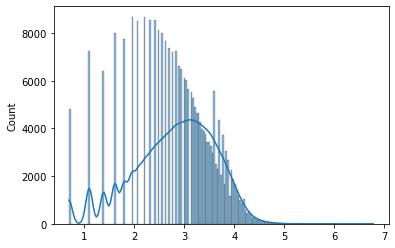

In [61]:
# logÎ•º ÏîåÏõå visitorsÏùò Î∂ÑÌè¨Î•º Ï†ïÍ∑úÌôî
# Ïù¥ÌõÑ ÏòàÏ∏°Ìïú Í≤∞Í≥ºÏóê np.expm1()Î•º Ï†ÅÏö©Ìï¥ Ï£ºÏñ¥Ïïº Ìï® 
y_train = np.log1p(y_train.values)

sns.histplot(y_train, kde=True)

### XGBRegressor

In [ ]:
from xgboost import XGBRegressor # XGBoost Regressor Î™®Îç∏

model = XGBRegressor(random_state=110, verbosity=0, nthread=23, n_estimators=980, max_depth=4)
model.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)
print(len(pred))

# train_targetÏóê log1pÎ•º ÏîåÏõåÏÑú Ï†ïÍ∑úÌôîÎ•º Ìï¥Ï£ºÏóàÍ∏∞ ÎïåÎ¨∏Ïóê expm1Î°ú Í∞íÏùÑ Î≥µÍµ¨Ìï¥Ï§çÎãàÎã§
pred = np.expm1(pred)
pred = np.clip(pred, a_min=1, a_max=None)
# pred = pred.astype(int)

In [ ]:
submission['visitors'] = pred
submission.to_csv('sampleSubmission.csv', index=False)